# What is a time series problem?

Time series problems deal with data over time.

Such as, the number of staff members in a company over 10-years, sales of computers for the past 5-years, electricity usage for the past 50-years.

The timeline can be short (seconds/minutes) or long (years/decades). And the problems you might investigate using can usually be broken down into two categories.

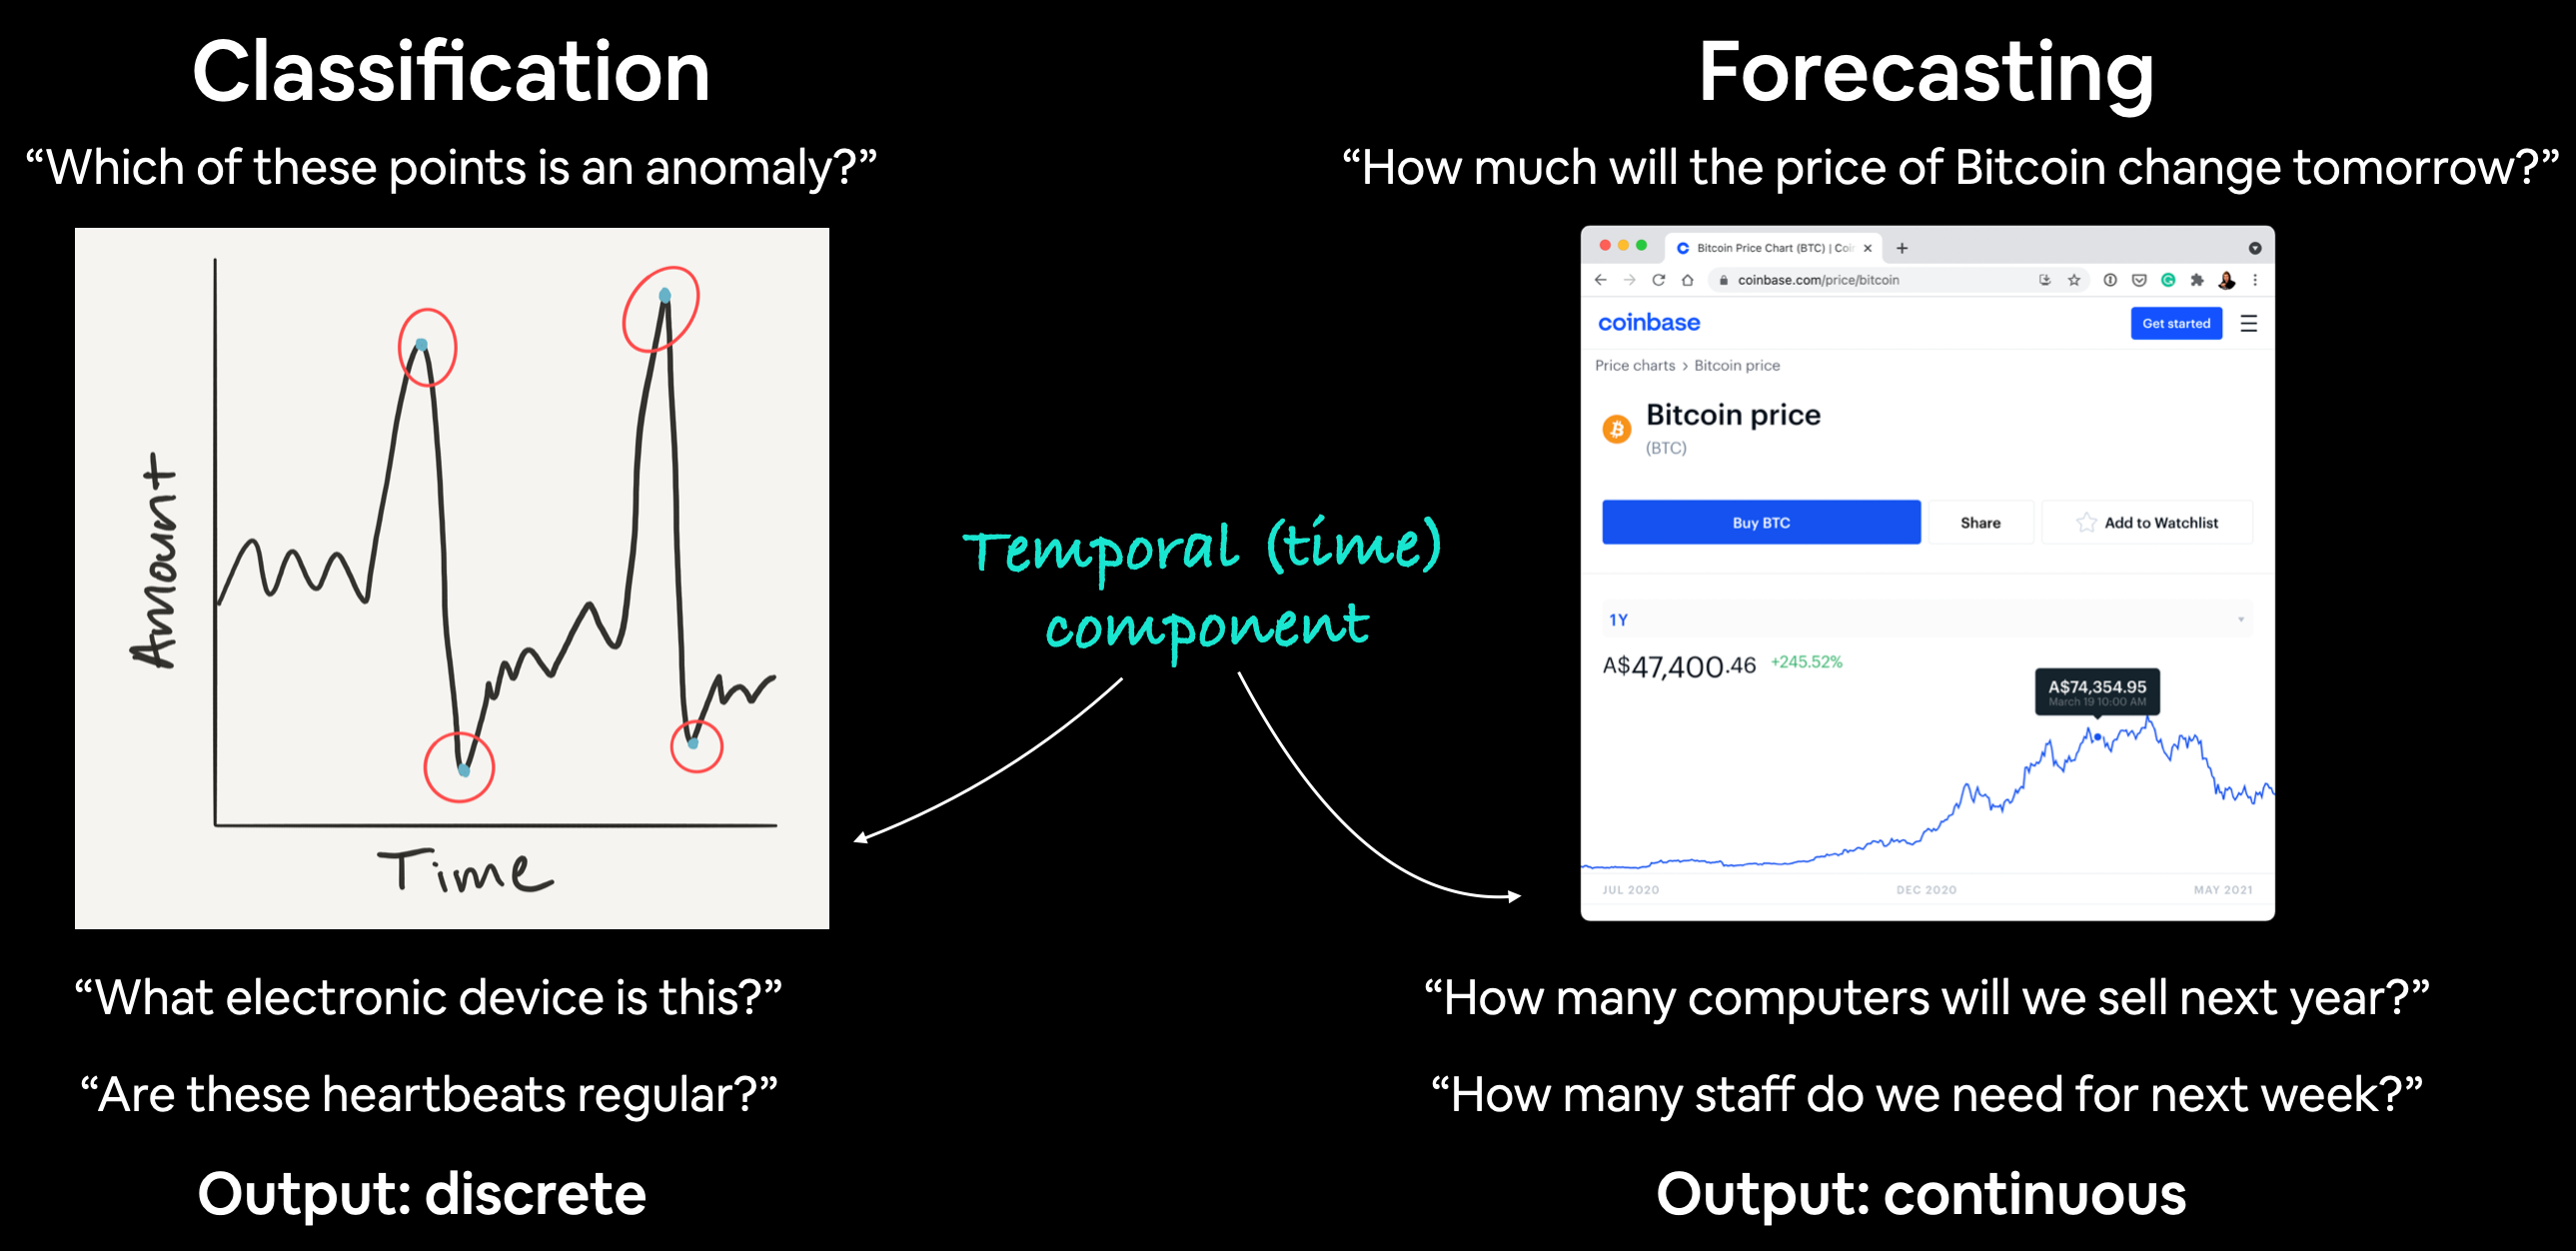

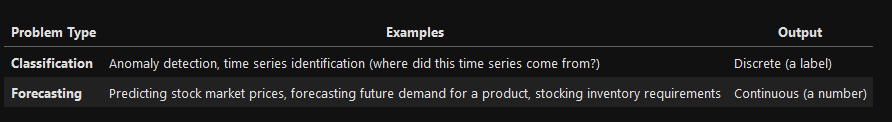

In both cases above, a supervised learning approach is often used. Meaning, you'd have some example data and a label assosciated with that data.

For example, in forecasting the price of Bitcoin, your data could be the historical price of Bitcoin for the past month and the label could be today's price (the label can't be tomorrow's price because that's what we'd want to predict).

## Coverage (broadly)

* Download & format time series data (historical proce of Bitcoin)
* Write preprocessing function to prepare time series data
* Set up multiple time series modelling experiments
* Build multivariate model to take in multivariate time series data
* Replicate the N=BEATS algorithm using Tensorflow
* Make forecasts with prediction intervals
* Demonstrate why time series forecasting can be BS with the turkey problem 🦃




## Coverage (in details)

We've got a lot to go through.

* Get time series data (the historical price of Bitcoin)
        Load in time series data using pandas/Python's CSV module
* Format data for a time series problem
        Creating training and test sets (the wrong way)
        Creating training and test sets (the right way)
        Visualizing time series data
        Turning time series data into a supervised learning problem (windowing)
        Preparing univariate and multivariate (more than one variable) data
* Evaluating a time series forecasting model
* Setting up a series of deep learning modelling experiments
        Dense (fully-connected) networks
        Sequence models (LSTM and 1D CNN)
        Ensembling (combining multiple models together)
        Multivariate models
        Replicating the N-BEATS algorithm using TensorFlow layer subclassing
* Creating a modelling checkpoint to save the best performing model during training
* Making predictions (forecasts) with a time series model
* Creating prediction intervals for time series model forecasts
* Discussing two different types of uncertainty in machine learning (data uncertainty and model uncertainty)
* |Demonstrating why forecasting in an open system is BS (the turkey problem)


# Check for GPU




In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c0ce2840-6210-6180-475d-b2ce3e8f15b0)


# Get data

To build a time series forecasting model, the first thing we're going to need is data.

And since we're trying to predict the price of Bitcoin, we'll need Bitcoin data.

Specifically, we're going to get the prices of Bitcoin from 01 October 2013 to 18 May 2021.

Why these dates?

Because 01 October 2013 is when our data source [Coindesk](https://www.coindesk.com/price/bitcoin/) started recording the price of Bitcoin and 18 May 2021 is when this notebook was created.

If you're going through this notebook at a later date, you'll be able to use what you learn to predict on later dates of Bitcoin, you'll just have to adjust the data source.

In [ ]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://github.com/SNNJM/Tensorflow_Deep_Learning/raw/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-07-14 15:41:58--  https://github.com/SNNJM/Tensorflow_Deep_Learning/raw/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SNNJM/Tensorflow_Deep_Learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv [following]
--2023-07-14 15:41:58--  https://raw.githubusercontent.com/SNNJM/Tensorflow_Deep_Learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>

## Importing time series data with pandas


Now we've got some data to work with, let's import it using pandas so we can visualize it.

Because our data is in CSV (comma separated values) format (a very common data format for time series), we'll use the pandas read_csv() function.

And because our data has a date component, we'll tell pandas to parse the dates using the parse_dates parameter passing it the name our of the date column ("Date").

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()


Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB




Because we told pandas to parse the date column and set it as the index, its not in the list of columns.

You can also see there isn't many samples.


In [ ]:
# How many samples do we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's only 2787 total samples.

This is something you'll run into with time series data problems. Often, the number of samples isn't as large as other kinds of data.

For example, collecting one sample at different time frames results in:

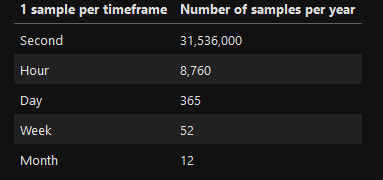

🔑 Note: The frequency at which a time series value is collected is often referred to as seasonality. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a seasonality of 365. Time series data collected with different seasonality values often exhibit seasonal patterns (e.g. electricity demand behing higher in Summer months for air conditioning than Winter months). For more on different time series patterns, see Forecasting: Principles and Practice Chapter 2.3.

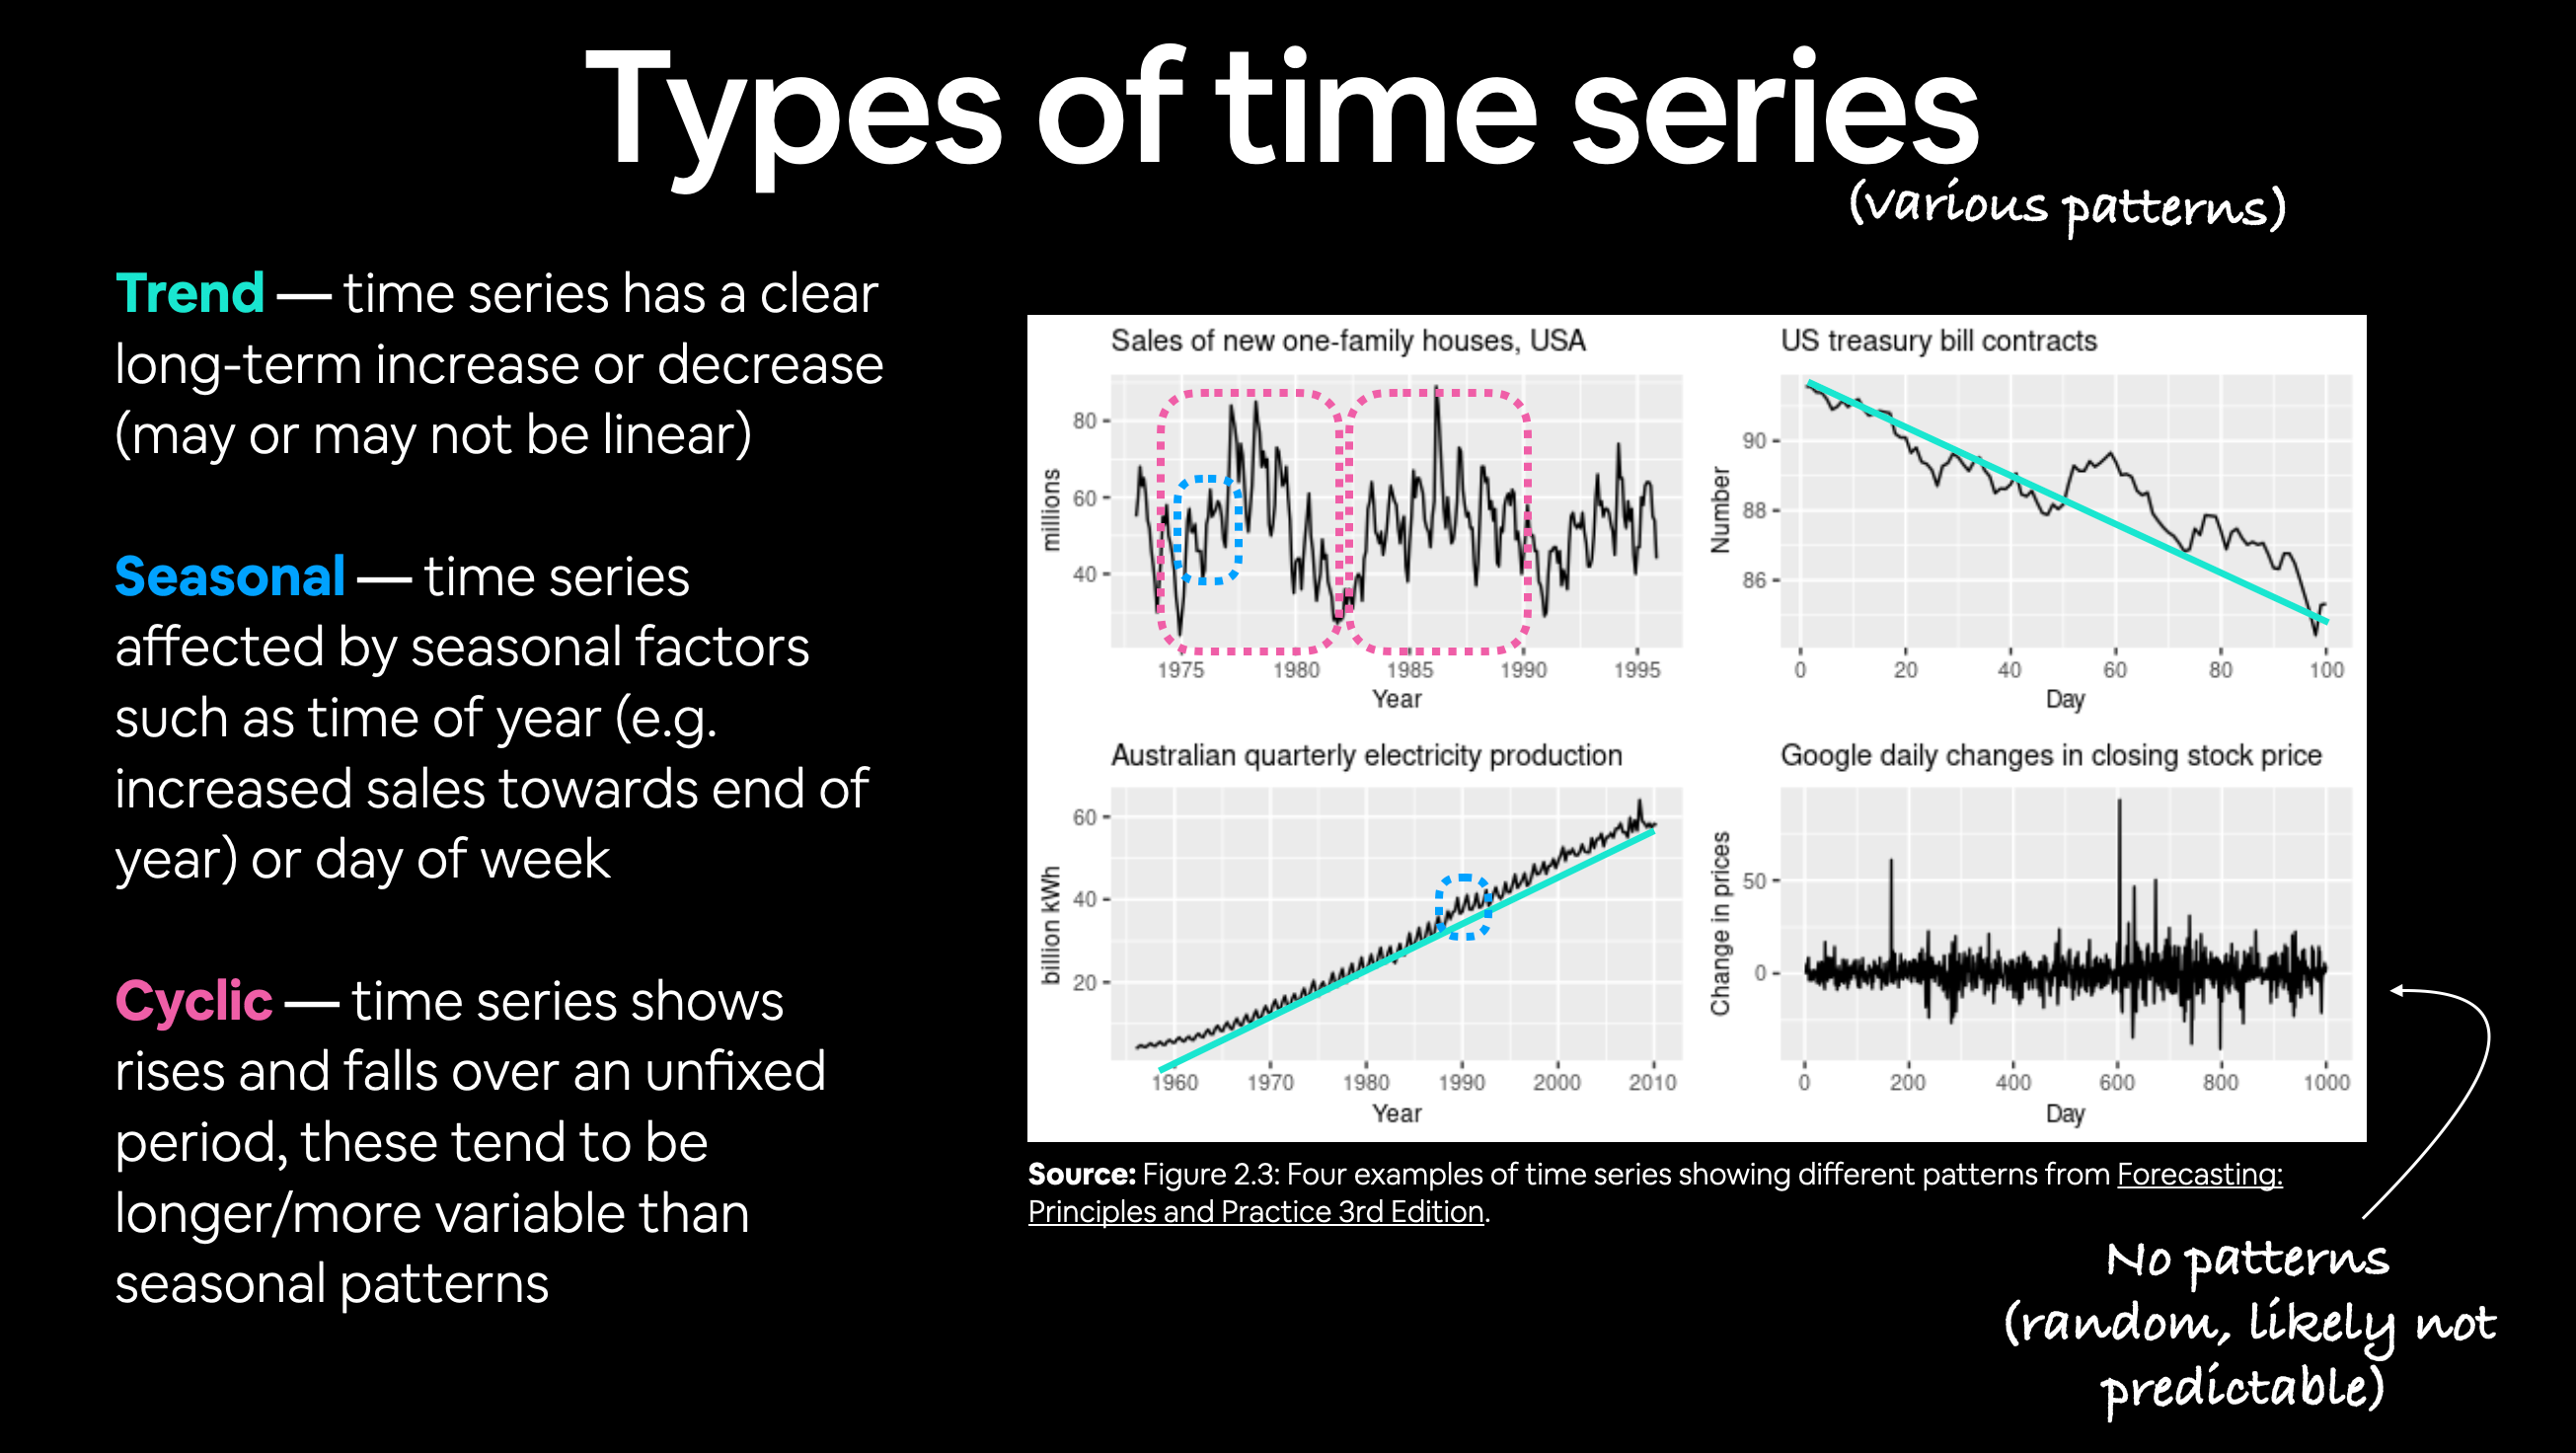

Example of different kinds of patterns you'll see in time series data. Notice the bottom right time series (Google stock price changes) has little to no patterns, making it difficult to predict. See [Forecasting: Principles and Practice Chapter 2.3](https://otexts.com/fpp3/tspatterns.html) for full graphic.

Deep learning algorithms usually flourish with lots of data, in the range of thousands to millions of samples.

In our case, we've got the daily prices of Bitcoin, a max of 365 samples per year.

But that doesn't we can't try them with our data.

To simplify, let's remove some of the columns from our data so we're only left with a date index and the closing price.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866



Much better!

But that's only five days worth of Bitcoin prices, let's plot everything we've got.


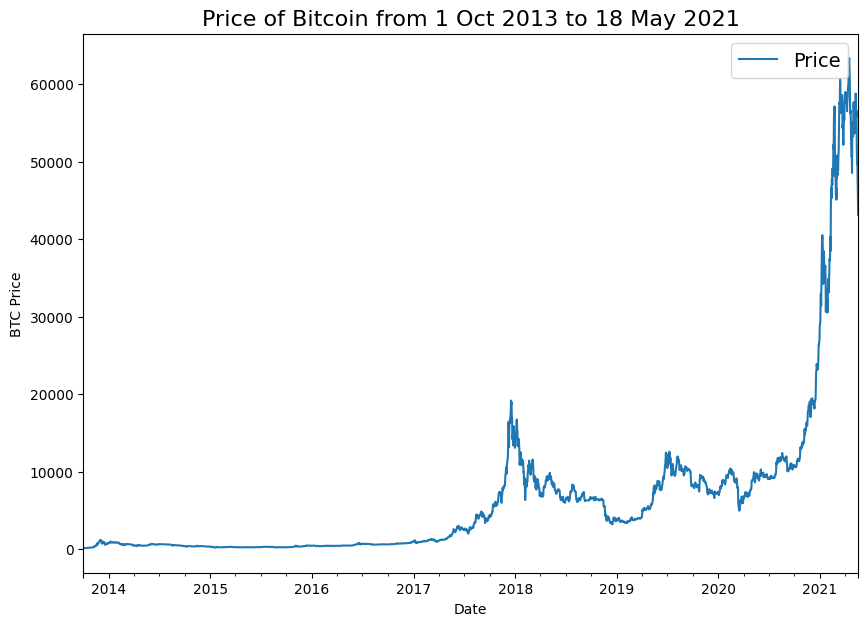

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

Woah, looks like it would've been a good idea to buy Bitcoin back in 2014.

## Importing time series data with Python's CSV module

If your time series data comes in CSV form you don't necessarily have to use pandas.

You can use Python's in-built csv module. And if you're working with dates, you might also want to use Python's datetime.

Let's see how we can replicate the plot we created before except this time using Python's csv and datetime modules.

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

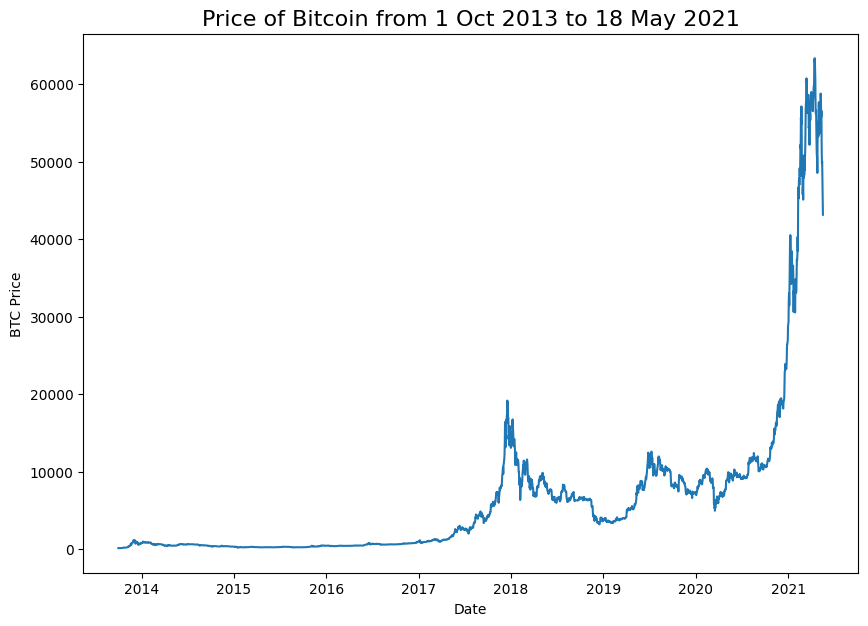

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

because we formatted the timesteps to be datetime objects, matplotlib displays a fantastic looking date axis.

# Format Data Part 1: Creating train and test sets for time series data

Usually, you could create a train and test split using a function like Scikit-Learn's outstanding train_test_split() but as we'll see in a moment, this doesn't really cut it for time series data.

But before we do create splits, it's worth talking about what kind of data we have.

In time series problems, you'll either have **univariate** or multivariate data.

our data:

* Univariate time series data deals with one variable, for example, using the price of Bitcoin to predict the price of Bitcoin.
* Multivariate time series data deals with more than one variable, for example, predicting electricity demand using the day of week, time of year and number of houses in a region.


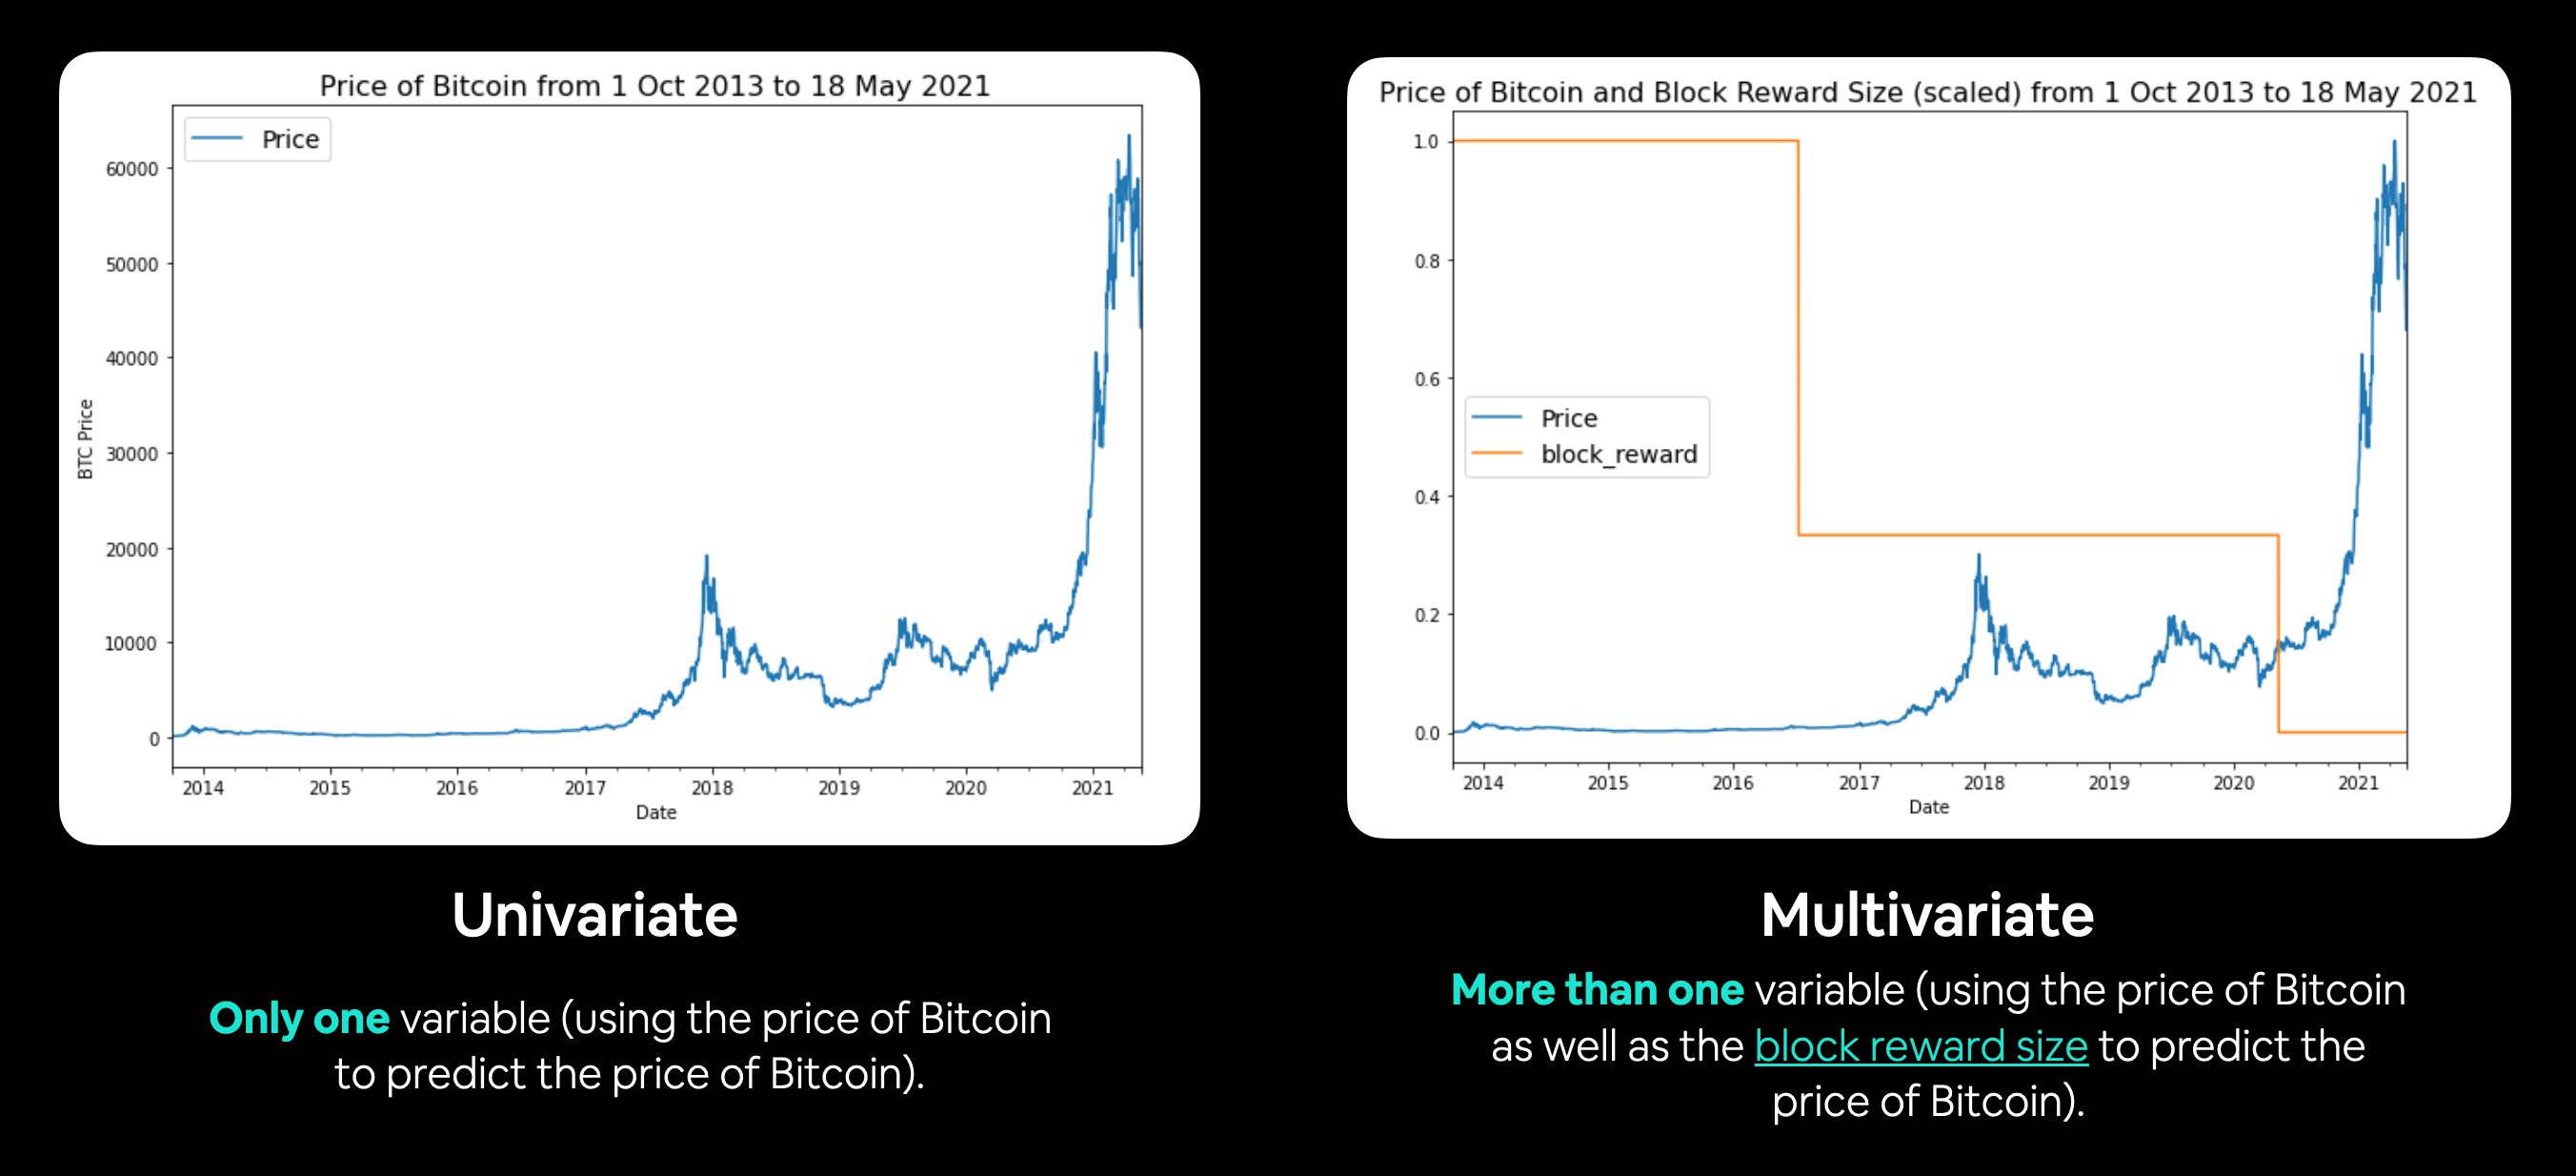

Example of univariate and multivariate time series data. Univariate involves using the target to predict the target. Multivariate inolves using the target as well as another time series to predict the target.

## Create train & test sets for time series (the wrong way)

Okay, we've figured out we're dealing with a univariate time series, so we only have to make a split on one variable (for multivariate time series, you will have to split multiple variables).

How about we first see the wrong way for splitting time series data?

Let's turn our DataFrame index and column into NumPy arrays.

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

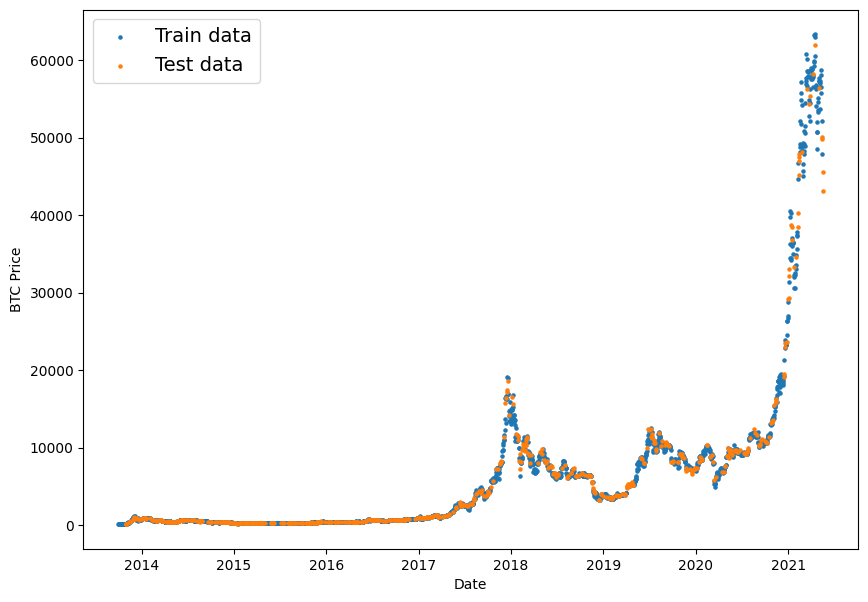

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();




Hmmm... what's wrong with this plot?

Well, let's remind ourselves of what we're trying to do.

We're trying to use the historical price of Bitcoin to predict future prices of Bitcoin.

With this in mind, our seen data (training set) is what?

Prices of Bitcoin in the past.

And our unseen data (test set) is?

Prices of Bitcoin in the future.

Does the plot above reflect this?

No.

Our test data is scattered all throughout the training data.

This kind of random split is okay for datasets without a time component (such as images or passages of text for classification problems) but for time series, we've got to take the time factor into account.

To fix this, we've got to split our data in a way that reflects what we're actually trying to do.

We need to split our historical Bitcoin data to have a dataset that reflects the past (train set) and a dataset that reflects the future (test set).


## Create train & test sets for time series (the right way)

Of course, there's no way we can actually access data from the future.

But we can engineer our test set to be in the future with respect to the training set.

To do this, we can create an abitrary point in time to split our data.

Everything before the point in time can be considered the training set and everything after the point in time can be considered the test set.

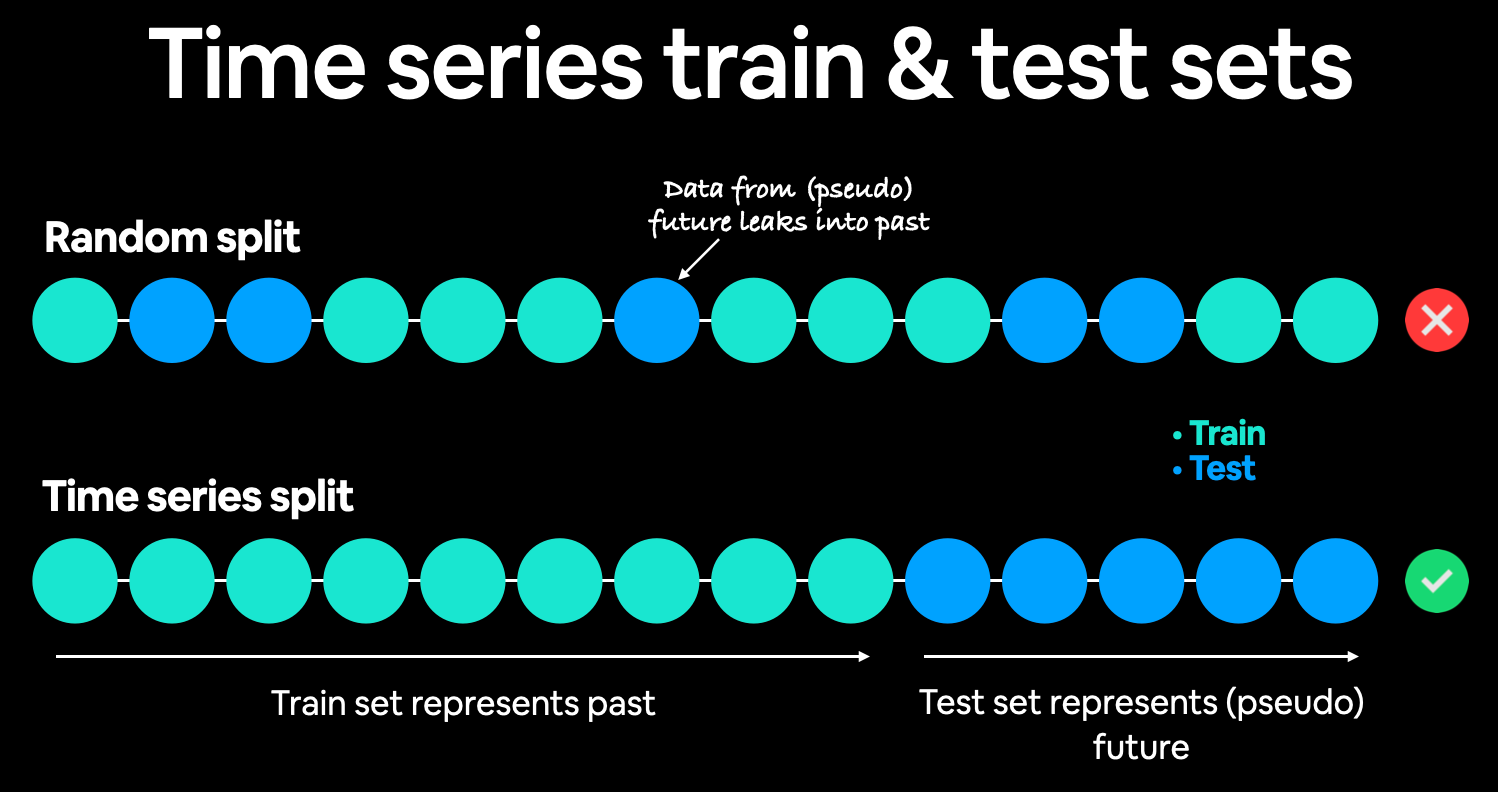

Demonstration of time series split. Rather than a traditionaly random train/test split, it's best to split the time series data sequentially. Meaning, the test data should be data from the future when compared to the training data.

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)



Okay, looks like our custom made splits are the same lengths as the splits we made with train_test_split.

But again, these are numbers on a page.

And you know how the saying goes, trust one eye more than two ears.

Let's visualize.


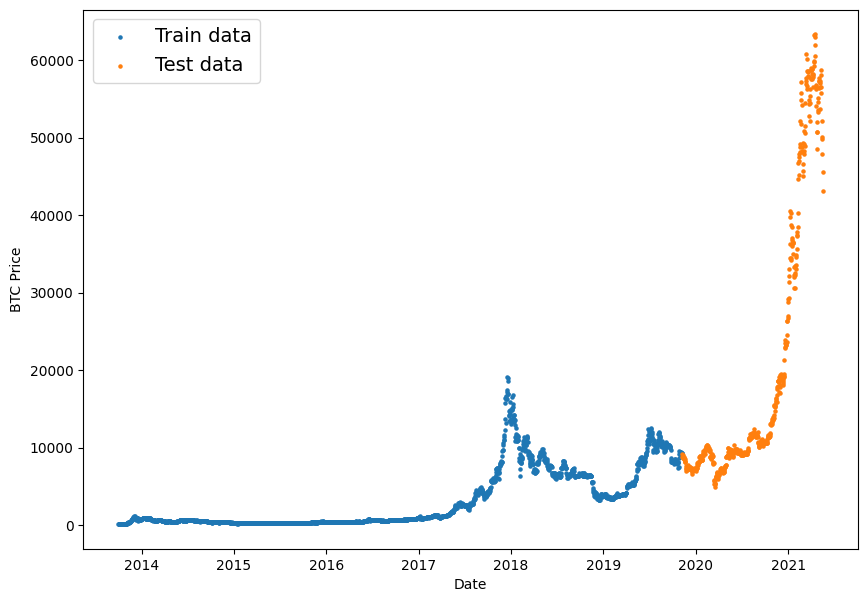

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

e're going to be using the training set (past) to train a model to try and predict values on the test set (future).

Because the test set is an artificial future, we can guage how our model might perform on actual future data.

🔑 Note: The amount of data you reserve for your test set not set in stone. You could have 80/20, 90/10, 95/5 splits or in some cases, you might not even have enough data to split into train and test sets (see the resource below). The point is to remember the test set is a pseudofuture and not the actual future, it is only meant to give you an indication of how the models you're building are performing.

## Create a plotting function

Rather than retyping matplotlib commands to continuously plot data, let's make a plotting function we can reuse later.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

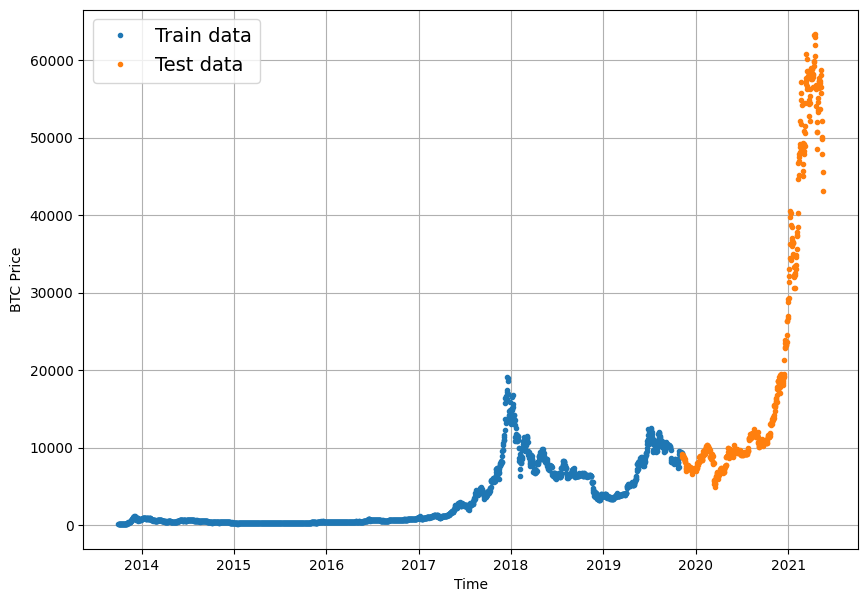

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")



Looking good!

Time for some modelling experiments.


# Modelling Experiments

We can build almost any kind of model for our problem as long as the data inputs and outputs are formatted correctly.

However, just because we can build almost any kind of model, doesn't mean it'll perform well/should be used in a production setting.

We'll see what this means as we build and evaluate models throughout.

Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

* horizon = number of timesteps to predict into future
* window = number of timesteps from past used to predict horizon

For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

Now, how about those modelling experiments?

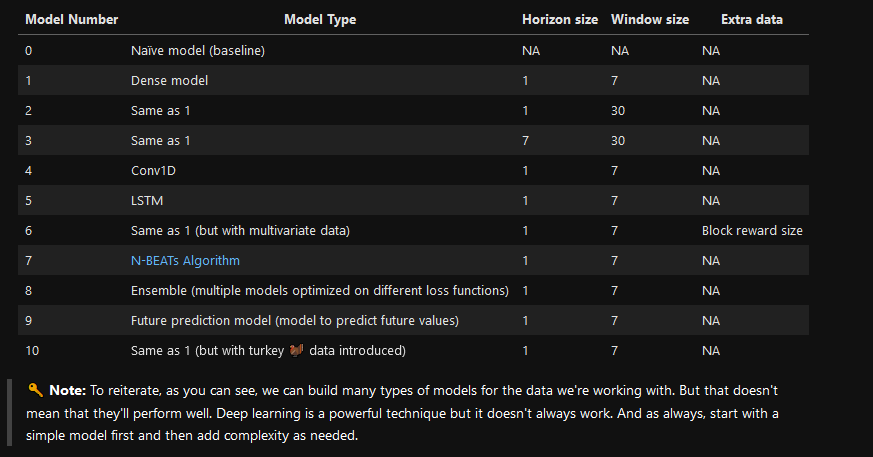

# Model 0: Naïve forecast (baseline)

One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:

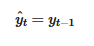

which means:

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).


🔑 Note: For the sake of this notebook, an open system is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in open systems is generally quite poor.

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

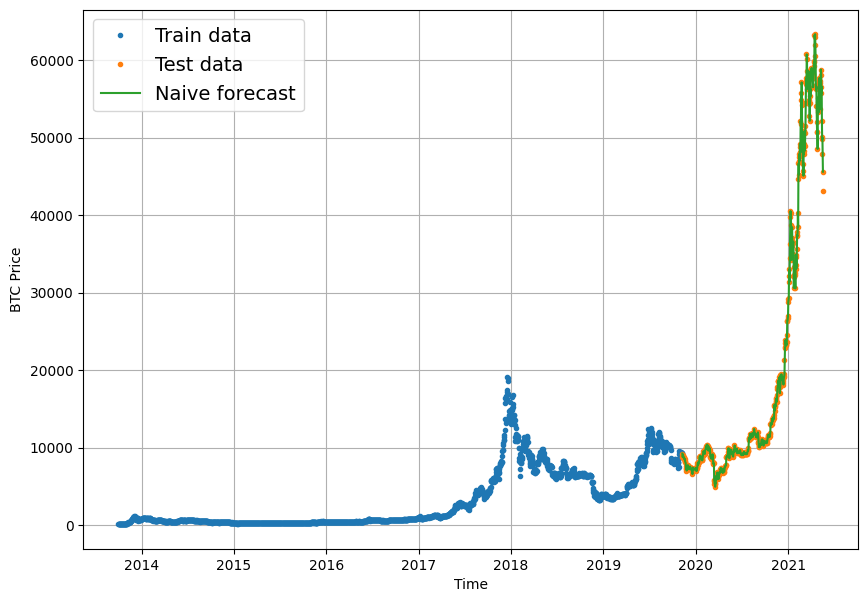

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");


 create an offset value and passing it to the start parameter of our plot_time_series() function.

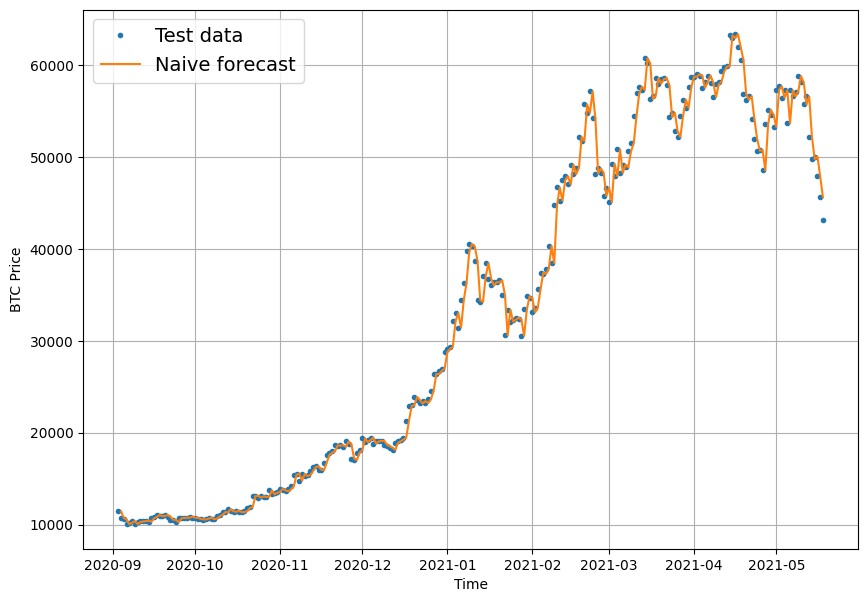

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


## Evaluating a time series model

Time series forecasting often involves predicting a number (in our case, the price of Bitcoin).

And what kind of problem is predicting a number?

Ten points if you said regression.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: how do our model's predictions (y_pred) compare against the actual values (y_true or ground truth values)?

📖 Resource: We're going to be using several metrics to evaluate our different model's time series forecast accuracy. Many of them are sourced and explained mathematically and conceptually in Forecasting: Principles and Practice chapter 5.8, I'd recommend reading through here for a more in-depth overview of what we're going to practice.

For all of the following metrics, lower is better (for example an MAE of 0 is better than an MAE 100).

### Scale-dependent errors

These are metrics which can be used to compare time series values and forecasts that are on the same scale.

For example, Bitcoin historical prices in USD veresus Bitcoin forecast values in USD.

| Metric	| Details	 | Code |
|---------|----------|:----------|
| MAE (mean absolute error) |	Easy to interpret (a forecast is X amount different from actual amount).Forecast methods which minimises the MAE will lead to forecasts of the median.|	tf.keras.metrics.mean_absolute_error()|
|RMSE (root mean square error)|	Forecasts which minimise the RMSE lead to forecasts of the mean.|	tf.sqrt(tf.keras.metrics.mean_square_error())|

## Percentage errors

Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

|Metric	|Details	|Code|
|-------|---------|----|
|MAPE (mean absolute percentage error)|	Most commonly used percentage error. May explode (not work) if y=0.|	tf.keras.metrics.mean_absolute_percentage_error()|
|sMAPE (symmetric mean absolute percentage error)|Recommended not to be used by Forecasting: Principles and Practice, though it is used in forecasting competitions.|	Custom implementation|

## Scaled errors

Scaled errors are an alternative to percentage errors when comparing forecast performance across different time series.

|Metric	|Details	|Code|
|-------|---------|----|
|MASE (mean absolute scaled error).|	MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.|	See sktime's mase_loss()|

🤔 Question: There are so many metrics... which one should I pay most attention to? It's going to depend on your problem. However, since its ease of interpretation (you can explain it in a sentence to your grandma), MAE is often a very good place to start.

Create a function to help us calculate evaluation metrics on forecasts.

In [ ]:
# Let's get TensorFlow!
import tensorflow as tf

# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [ ]:
 #test function on the naive forecast

naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

Taking a look at the naïve forecast's MAE, it seems on average each forecast is ~$567 different than the actual Bitcoin price.

In [ ]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

Okay, looking at these two values is starting to give us an idea of how our model is performing:

The average price of Bitcoin in the test dataset is: $20,056 (note: average may not be the best measure here, since the highest price is over 3x this value and the lowest price is over 4x lower)

Each prediction in naive forecast is on average off by: $567

Is this enough to say it's a good model?

That's up your own interpretation. Personally, I'd prefer a model which was closer to the mark.

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

|Model/Library| Name	|Resource|
|-------------|-------|--------|
|Moving average|	https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/|
|ARIMA (Autoregression Integrated Moving Average)	|https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/|
|sktime (Scikit-Learn for time series)|	https://github.com/alan-turing-institute/sktime|
|TensorFlow Decision Forests (random forest, gradient boosting trees)|	https://www.tensorflow.org/decision_forests|
|Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)|	https://github.com/facebookresearch/Kats|
|LinkedIn Greykite (flexible, intuitive and fast forecasts)|	https://github.com/linkedin/greykite|

# Format Data Part 2: Windowing dataset

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

Window for one week (univariate time series)


```
[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]
```





Or for the price of Bitcoin, it'd look like:

Window for one week with the target of predicting the next day (Bitcoin prices)

```
[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]

[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]

[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```



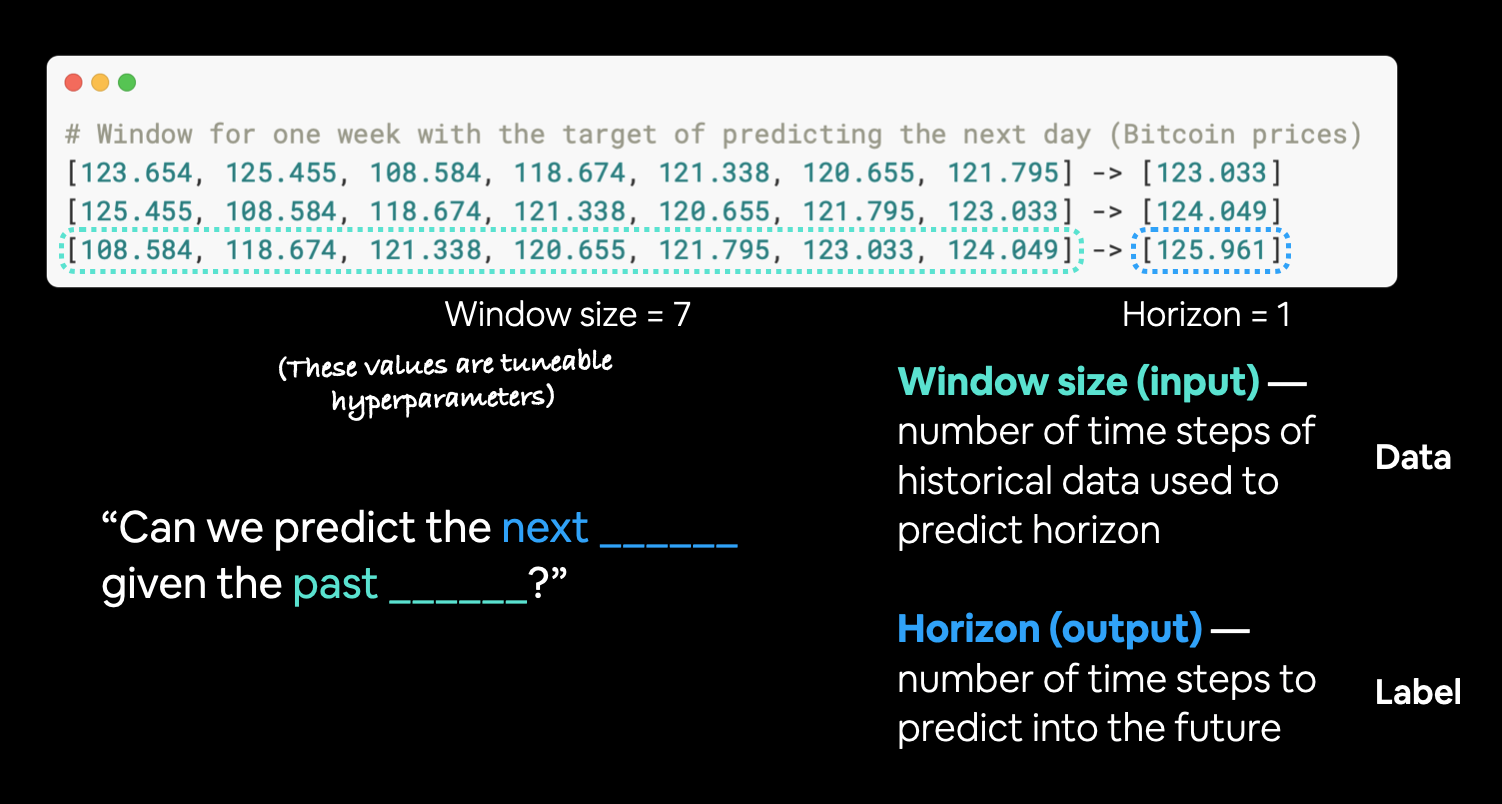

Example of windows and horizons for Bitcoin data. Windowing can be used to turn time series data into a supervised learning problem.

In [ ]:
# This function take in a univariate time series and turn it into windows and horizons of specified sizes.
# start with the default horizon size of 1 and a window size of 7

HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]





In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [1 2 3 4 5 6 7] -> Label: 8


We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing.

Let's write a function which:

1. Creates a window step of specific window size, for example: `[[0, 1, 2, 3, 4, 5, 6, 7]]`

2. Uses NumPy indexing to create a 2D of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```

3. Uses the 2D array of multuple window steps to index on a target series
4. Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

📖 Resource: The function created below has been adapted from Syafiq Kamarul Azman's article Fast and Robust Sliding Window Vectorization with NumPy.

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets

Time to turn our windows into training and test splits.

We could've windowed our existing training and test splits, however, with the nature of windowing (windowing often requires an offset at some point in the data), it usually works better to window the data first, then split it into training and test sets.

Let's write a function which takes in full sets of windows and their labels and splits them into train and test splits.

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:

train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint

Because our model's performance will fluctuate from experiment to experiment, we'll want to make sure we're comparing apples to apples.

What I mean by this is in order for a fair comparison, we want to compare each model's best performance against each model's best performance.

For example, if model_1 performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model from epoch 55 to compare to other models rather than the version of the model from epoch 100.

And the same goes for each of our other models: compare the best against the best.

To take of this, we'll implement a ModelCheckpoint callback.

The ModelCheckpoint callback will monitor our model's performance during training and save the best model to file by setting save_best_only=True.

That way when evaluating our model we could restore its best performing configuration from file.

🔑 Note: Because of the size of the dataset (smaller than usual), you'll notice our modelling experiment results fluctuate quite a bit during training (hence the implementation of the ModelCheckpoint callback to save the best model).

Because we're going to be running multiple experiments, it makes sense to keep track of them by saving models to file under different names.

To do this, we'll write a small function to create a ModelCheckpoint callback which saves a model to specified filename.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


# Model 1: Dense model (window = 7, horizon = 1)


Time to build one of our models.

If you think we've been through a fair bit of preprocessing before getting here, you're right.

Often, preparing data for a model is one of the largest parts of any machine learning project.

And once you've got a good model in place, you'll probably notice far more improvements from manipulating the data (e.g. collecting more, improving the quality) than manipulating the model.

We're going to start by keeping it simple, model_1 will have:

* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

Why these values?

picked randomly for experimentation.

A batch size of 32 works pretty well too and we could always train for less epochs but since the model runs so fast (you'll see in a second, it's because the number of samples we have isn't massive) we might as well train for more.

🔑 Note: As always, many of the values for machine learning problems are experimental. A reminder that the values you can set yourself in a machine learning algorithm (the hidden units, the batch size, horizon size, window size) are called [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning). And experimenting to find the best values for hyperparameters is called hyperparameter tuning. Where as parameters learned by a model itself (patterns in the data, formally called weights & biases) are referred to as parameters.

Let's import TensorFlow and build our first deep learning model for time series.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
 1/18 [>.............................] - ETA: 1:39 - loss: 3323.3970 - mae: 3323.3970

18/18 [==============================] - 7s 45ms/step - loss: 1399.7161 - mae: 1399.7161 - val_loss: 2876.5684 - val_mae: 2876.5684
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 428.6437 - mae: 428.6437

18/18 [==============================] - 1s 29ms/step - loss: 379.2151 - mae: 379.2151 - val_loss: 1777.7045 - val_mae: 1777.7045
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 231.0086 - mae: 231.0086

18/18 [==============================] - 1s 30ms/step - loss: 220.5381 - mae: 220.5381 - val_loss: 1317.1277 - val_mae: 1317.1277
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 256.5500 - mae: 256.5500

18/18 [==============================] - 1s 31ms/step - loss: 196.7085 - mae: 196.7085 - val_loss: 1080.8102 - val_mae: 1080.8102
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 176.7490 - mae: 176.7490

18/18 [==============================] - 1s 30ms/step - loss: 187.7432 - mae: 187.7432 - val_loss: 1019.9938 - val_mae: 1019.9938
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1599 - mae: 142.1599

18/18 [==============================] - 1s 30ms/step - loss: 184.1108 - mae: 184.1108 - val_loss: 999.8133 - val_mae: 999.8133
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 175.8857 - mae: 175.8857 - val_loss: 1012.0272 - val_mae: 1012.0272
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 155.9098 - mae: 155.9098

18/18 [==============================] - 1s 29ms/step - loss: 168.7563 - mae: 168.7563 - val_loss: 917.9117 - val_mae: 917.9117
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0354 - mae: 137.0354

18/18 [==============================] - 0s 28ms/step - loss: 166.2008 - mae: 166.2008 - val_loss: 899.1779 - val_mae: 899.1779
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 171.5434 - mae: 171.5434

18/18 [==============================] - 1s 40ms/step - loss: 159.8604 - mae: 159.8604 - val_loss: 871.6490 - val_mae: 871.6490
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 164.5569 - mae: 164.5569

18/18 [==============================] - 0s 28ms/step - loss: 152.2013 - mae: 152.2013 - val_loss: 860.4776 - val_mae: 860.4776
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 148.1602 - mae: 148.1602 - val_loss: 876.5723 - val_mae: 876.5723
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3964 - mae: 121.3964

18/18 [==============================] - 0s 28ms/step - loss: 146.5544 - mae: 146.5544 - val_loss: 853.5566 - val_mae: 853.5566
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 154.6572 - mae: 154.6572

18/18 [==============================] - 0s 28ms/step - loss: 141.4616 - mae: 141.4616 - val_loss: 809.8595 - val_mae: 809.8595
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 143.1550 - mae: 143.1550

18/18 [==============================] - 0s 28ms/step - loss: 142.3058 - mae: 142.3058 - val_loss: 763.4692 - val_mae: 763.4692
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 122.1187 - mae: 122.1187

18/18 [==============================] - 0s 28ms/step - loss: 134.7573 - mae: 134.7573 - val_loss: 755.6326 - val_mae: 755.6326
Epoch 17/100
18/18 [==============================] - 0s 4ms/step - loss: 133.3213 - mae: 133.3213 - val_loss: 834.2631 - val_mae: 834.2631
Epoch 18/100
18/18 [==============================] - 0s 4ms/step - loss: 136.1581 - mae: 136.1581 - val_loss: 773.2128 - val_mae: 773.2128
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 84.5322 - mae: 84.5322

18/18 [==============================] - 0s 28ms/step - loss: 130.1604 - mae: 130.1604 - val_loss: 735.7300 - val_mae: 735.7300
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 145.9470 - mae: 145.9470

18/18 [==============================] - 0s 29ms/step - loss: 126.6923 - mae: 126.6923 - val_loss: 688.2777 - val_mae: 688.2777
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 157.6756 - mae: 157.6756

18/18 [==============================] - 0s 28ms/step - loss: 131.1549 - mae: 131.1549 - val_loss: 677.5458 - val_mae: 677.5458
Epoch 22/100
18/18 [==============================] - 0s 4ms/step - loss: 127.7248 - mae: 127.7248 - val_loss: 680.6898 - val_mae: 680.6898
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 129.0159 - mae: 129.0159

18/18 [==============================] - 0s 29ms/step - loss: 127.2125 - mae: 127.2125 - val_loss: 674.3596 - val_mae: 674.3596
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 137.0324 - mae: 137.0324

18/18 [==============================] - 0s 29ms/step - loss: 124.0529 - mae: 124.0529 - val_loss: 673.0678 - val_mae: 673.0678
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 121.8891 - mae: 121.8891

18/18 [==============================] - 0s 29ms/step - loss: 121.8891 - mae: 121.8891 - val_loss: 651.7361 - val_mae: 651.7361
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 118.9588 - mae: 118.9588

18/18 [==============================] - 0s 28ms/step - loss: 120.5313 - mae: 120.5313 - val_loss: 643.5055 - val_mae: 643.5055
Epoch 27/100
18/18 [==============================] - 0s 4ms/step - loss: 122.1928 - mae: 122.1928 - val_loss: 644.2227 - val_mae: 644.2227
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 116.5849 - mae: 116.5849

18/18 [==============================] - 0s 28ms/step - loss: 120.4227 - mae: 120.4227 - val_loss: 642.5981 - val_mae: 642.5981
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 115.0867 - mae: 115.0867

18/18 [==============================] - 1s 42ms/step - loss: 117.8134 - mae: 117.8134 - val_loss: 641.2868 - val_mae: 641.2868
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2213 - mae: 130.2213

18/18 [==============================] - 0s 28ms/step - loss: 125.4590 - mae: 125.4590 - val_loss: 635.8659 - val_mae: 635.8659
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 121.4435 - mae: 121.4435 - val_loss: 638.4744 - val_mae: 638.4744
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 111.7211 - mae: 111.7211

18/18 [==============================] - 1s 39ms/step - loss: 117.1223 - mae: 117.1223 - val_loss: 625.1394 - val_mae: 625.1394
Epoch 33/100
18/18 [==============================] - 0s 8ms/step - loss: 114.7150 - mae: 114.7150 - val_loss: 660.7141 - val_mae: 660.7141
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0618 - mae: 116.0618 - val_loss: 676.5908 - val_mae: 676.5908
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 120.2468 - mae: 120.2468

18/18 [==============================] - 1s 40ms/step - loss: 114.9674 - mae: 114.9674 - val_loss: 605.2710 - val_mae: 605.2710
Epoch 36/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9918 - mae: 114.9918 - val_loss: 606.8258 - val_mae: 606.8258
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 109.7323 - mae: 109.7323

18/18 [==============================] - 1s 45ms/step - loss: 112.3731 - mae: 112.3731 - val_loss: 600.3899 - val_mae: 600.3899
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9777 - mae: 113.9777 - val_loss: 643.9308 - val_mae: 643.9308
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6013 - mae: 126.6013

18/18 [==============================] - 1s 31ms/step - loss: 113.2987 - mae: 113.2987 - val_loss: 594.7353 - val_mae: 594.7353
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 111.1420 - mae: 111.1420

18/18 [==============================] - 1s 31ms/step - loss: 111.1420 - mae: 111.1420 - val_loss: 592.7159 - val_mae: 592.7159
Epoch 41/100
 1/18 [>.............................] - ETA: 0s - loss: 105.0676 - mae: 105.0676

18/18 [==============================] - 0s 28ms/step - loss: 111.5816 - mae: 111.5816 - val_loss: 590.8157 - val_mae: 590.8157
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 116.1311 - mae: 116.1311 - val_loss: 672.0565 - val_mae: 672.0565
Epoch 43/100
18/18 [==============================] - 0s 4ms/step - loss: 122.0557 - mae: 122.0557 - val_loss: 661.7426 - val_mae: 661.7426
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 124.9785 - mae: 124.9785 - val_loss: 657.3113 - val_mae: 657.3113
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 86.0830 - mae: 86.0830

18/18 [==============================] - 0s 29ms/step - loss: 113.8935 - mae: 113.8935 - val_loss: 587.2968 - val_mae: 587.2968
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 117.0231 - mae: 117.0231 - val_loss: 607.3035 - val_mae: 607.3035
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 115.1274 - mae: 115.1274 - val_loss: 629.6601 - val_mae: 629.6601
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5507 - mae: 111.5507 - val_loss: 621.2708 - val_mae: 621.2708
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 161.6384 - mae: 161.6384

18/18 [==============================] - 1s 29ms/step - loss: 113.9422 - mae: 113.9422 - val_loss: 586.8333 - val_mae: 586.8333
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5439 - mae: 113.5439 - val_loss: 636.5010 - val_mae: 636.5010
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 111.5331 - mae: 111.5331 - val_loss: 615.7021 - val_mae: 615.7021
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 119.8761 - mae: 119.8761

18/18 [==============================] - 1s 29ms/step - loss: 113.3070 - mae: 113.3070 - val_loss: 578.8198 - val_mae: 578.8198
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2198 - mae: 114.2198 - val_loss: 634.9001 - val_mae: 634.9001
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 113.0042 - mae: 113.0042 - val_loss: 584.8649 - val_mae: 584.8649
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 120.1022 - mae: 120.1022 - val_loss: 583.8817 - val_mae: 583.8817
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 113.4020 - mae: 113.4020 - val_loss: 793.8248 - val_mae: 793.8248
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 134.3175 - mae: 134.3175 - val_loss: 715.0196 - val_mae: 715.0196
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0095 - mae: 116.0095 - val_loss: 584.4803 - val_mae: 584.4803
Epoch 59/100
 1/18 [>...........

18/18 [==============================] - 1s 30ms/step - loss: 110.4183 - mae: 110.4183 - val_loss: 574.6987 - val_mae: 574.6987
Epoch 60/100
18/18 [==============================] - 0s 4ms/step - loss: 108.4737 - mae: 108.4737 - val_loss: 598.5557 - val_mae: 598.5557
Epoch 61/100
 1/18 [>.............................] - ETA: 0s - loss: 135.5966 - mae: 135.5966

18/18 [==============================] - 1s 30ms/step - loss: 108.0759 - mae: 108.0759 - val_loss: 572.4638 - val_mae: 572.4638
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 108.3289 - mae: 108.3289 - val_loss: 610.6404 - val_mae: 610.6404
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4300 - mae: 114.4300 - val_loss: 625.2631 - val_mae: 625.2631
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 109.6400 - mae: 109.6400 - val_loss: 593.1342 - val_mae: 593.1342
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 126.4824 - mae: 126.4824

18/18 [==============================] - 1s 29ms/step - loss: 108.7149 - mae: 108.7149 - val_loss: 571.9311 - val_mae: 571.9311
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 115.5882 - mae: 115.5882

18/18 [==============================] - 1s 30ms/step - loss: 107.6961 - mae: 107.6961 - val_loss: 569.7465 - val_mae: 569.7465
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.8966 - mae: 106.8966 - val_loss: 609.8230 - val_mae: 609.8230
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4125 - mae: 114.4125 - val_loss: 694.5578 - val_mae: 694.5578
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 125.8461 - mae: 125.8461 - val_loss: 619.6672 - val_mae: 619.6672
Epoch 70/100
 1/18 [>.............................] - ETA: 0s - loss: 117.6308 - mae: 117.6308

18/18 [==============================] - 1s 46ms/step - loss: 128.9057 - mae: 128.9057 - val_loss: 568.5390 - val_mae: 568.5390
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3076 - mae: 112.3076 - val_loss: 595.6779 - val_mae: 595.6779
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3302 - mae: 109.3302 - val_loss: 570.7035 - val_mae: 570.7035
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3227 - mae: 113.3227 - val_loss: 729.0167 - val_mae: 729.0167
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 187.3419 - mae: 187.3419

18/18 [==============================] - 1s 31ms/step - loss: 109.0431 - mae: 109.0431 - val_loss: 568.3710 - val_mae: 568.3710
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2653 - mae: 108.2653 - val_loss: 587.0097 - val_mae: 587.0097
Epoch 76/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9924 - mae: 108.9924 - val_loss: 570.8867 - val_mae: 570.8867
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5637 - mae: 107.5637 - val_loss: 571.4527 - val_mae: 571.4527
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 107.5126 - mae: 107.5126 - val_loss: 580.1178 - val_mae: 580.1178
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4047 - mae: 107.4047 - val_loss: 570.2674 - val_mae: 570.2674
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1287 - mae: 107.1287 - val_loss: 588.4987 - val_mae: 588.4987
Epoch 81/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 107.1275 - mae: 107.1275 - val_loss: 565.1522 - val_mae: 565.1522
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4873 - mae: 107.4873 - val_loss: 582.9959 - val_mae: 582.9959
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 107.1286 - mae: 107.1286 - val_loss: 580.1874 - val_mae: 580.1874
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 102.2309 - mae: 102.2309

18/18 [==============================] - 1s 30ms/step - loss: 105.9658 - mae: 105.9658 - val_loss: 565.0458 - val_mae: 565.0458
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.1734 - mae: 105.1734 - val_loss: 596.2087 - val_mae: 596.2087
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2229 - mae: 109.2229 - val_loss: 566.4460 - val_mae: 566.4460
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2649 - mae: 108.2649 - val_loss: 614.4843 - val_mae: 614.4843
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 119.3679 - mae: 119.3679 - val_loss: 647.7375 - val_mae: 647.7375
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8213 - mae: 111.8213 - val_loss: 592.1085 - val_mae: 592.1085
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 138.4416 - mae: 138.4416

18/18 [==============================] - 1s 38ms/step - loss: 106.3844 - mae: 106.3844 - val_loss: 565.0004 - val_mae: 565.0004
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 106.4576 - mae: 106.4576 - val_loss: 573.6155 - val_mae: 573.6155
Epoch 97/100
17/18 [===========================>..] - ETA: 0s - loss: 105.7343 - mae: 105.7343

18/18 [==============================] - 1s 46ms/step - loss: 107.2151 - mae: 107.2151 - val_loss: 564.1795 - val_mae: 564.1795
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 105.4522 - mae: 105.4522 - val_loss: 570.7675 - val_mae: 570.7675
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1628 - mae: 107.1628 - val_loss: 572.3345 - val_mae: 572.3345
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8836 - mae: 114.8836 - val_loss: 694.2347 - val_mae: 694.2347


In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 3ms/step - loss: 694.2347 - mae: 694.2347


[694.2347412109375, 694.2347412109375]

the model achieves the same val_loss (in this case, this is MAE) as the last epoch.

But if we load in the version of model_1 which was saved to file using the ModelCheckpoint callback, we should see an improvement in results.

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.1796 - mae: 564.1796


[564.1795654296875, 564.1795654296875]

Much better! Due to the fluctuating performance of the model during training, loading back in the best performing model see's a sizeable improvement in MAE.

## Making forecasts with a model (on the test dataset)

We've trained a model and evaluated the it on the test data, but the project we're working on is called BitPredict 💰📈 so how do you think we could use our model to make predictions?

Since we're going to be running more modelling experiments, let's write a function which:

1. Takes in a trained model (just like model_1)
2. Takes in some input data (just like the data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8836.463, 8779.939, 9052.288, 8757.22 , 8744.544, 8773.376,
        8649.386, 8524.729, 8468.838, 8528.146], dtype=float32)>)

🔑 Note: With these outputs, our model isn't forecasting yet. It's only making predictions on the test dataset. Forecasting would involve a model making predictions into the future, however, the test dataset is only a pseudofuture.

Excellent! Now we've got some prediction values, let's use the evaluate_preds() we created before to compare them to the ground truth.

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results


{'mae': 564.17957,
 'mse': 1153095.1,
 'rmse': 1073.8226,
 'mape': 2.511514,
 'mase': 0.9911072}

In [ ]:
# How did our model go? Did it beat the naïve forecast?
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

It looks like our naïve model beats our first deep model on nearly every metric.

That goes to show the power of the naïve model and the reason for having a baseline for any machine learning project.

And of course, no evaluation would be finished without visualizing the results.

Let's use the plot_time_series() function to plot model_1_preds against the test data.

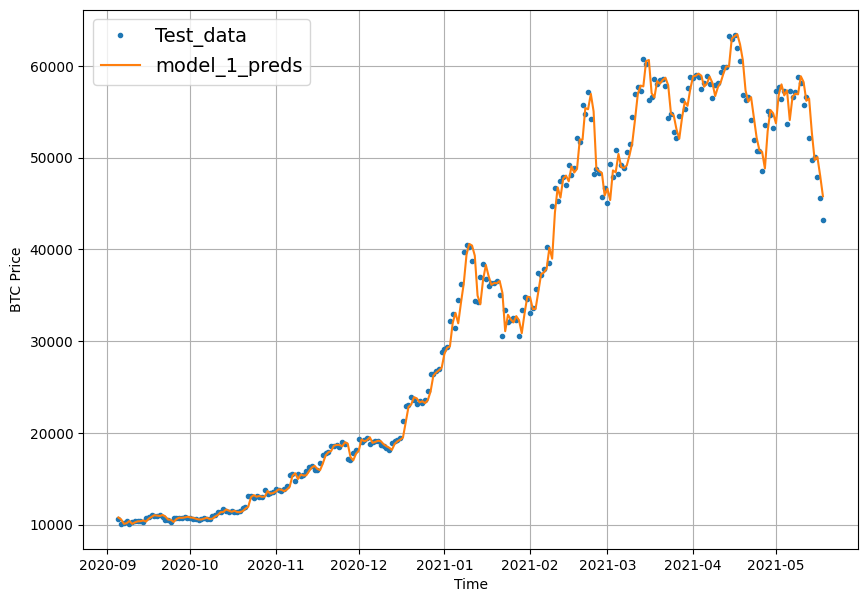

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


What's wrong with these predictions?

As mentioned before, they're on the test dataset. So they're not actual forecasts.



# Model 2: Dense (window = 30, horizon = 1)

A naïve model is currently beating our handcrafted deep learning model.

We can't let this happen.

Let's continue our modelling experiments.

We'll keep the previous model architecture but use a window size of 30.

In other words, we'll use the previous 30 days of Bitcoin prices to try and predict the next day price.

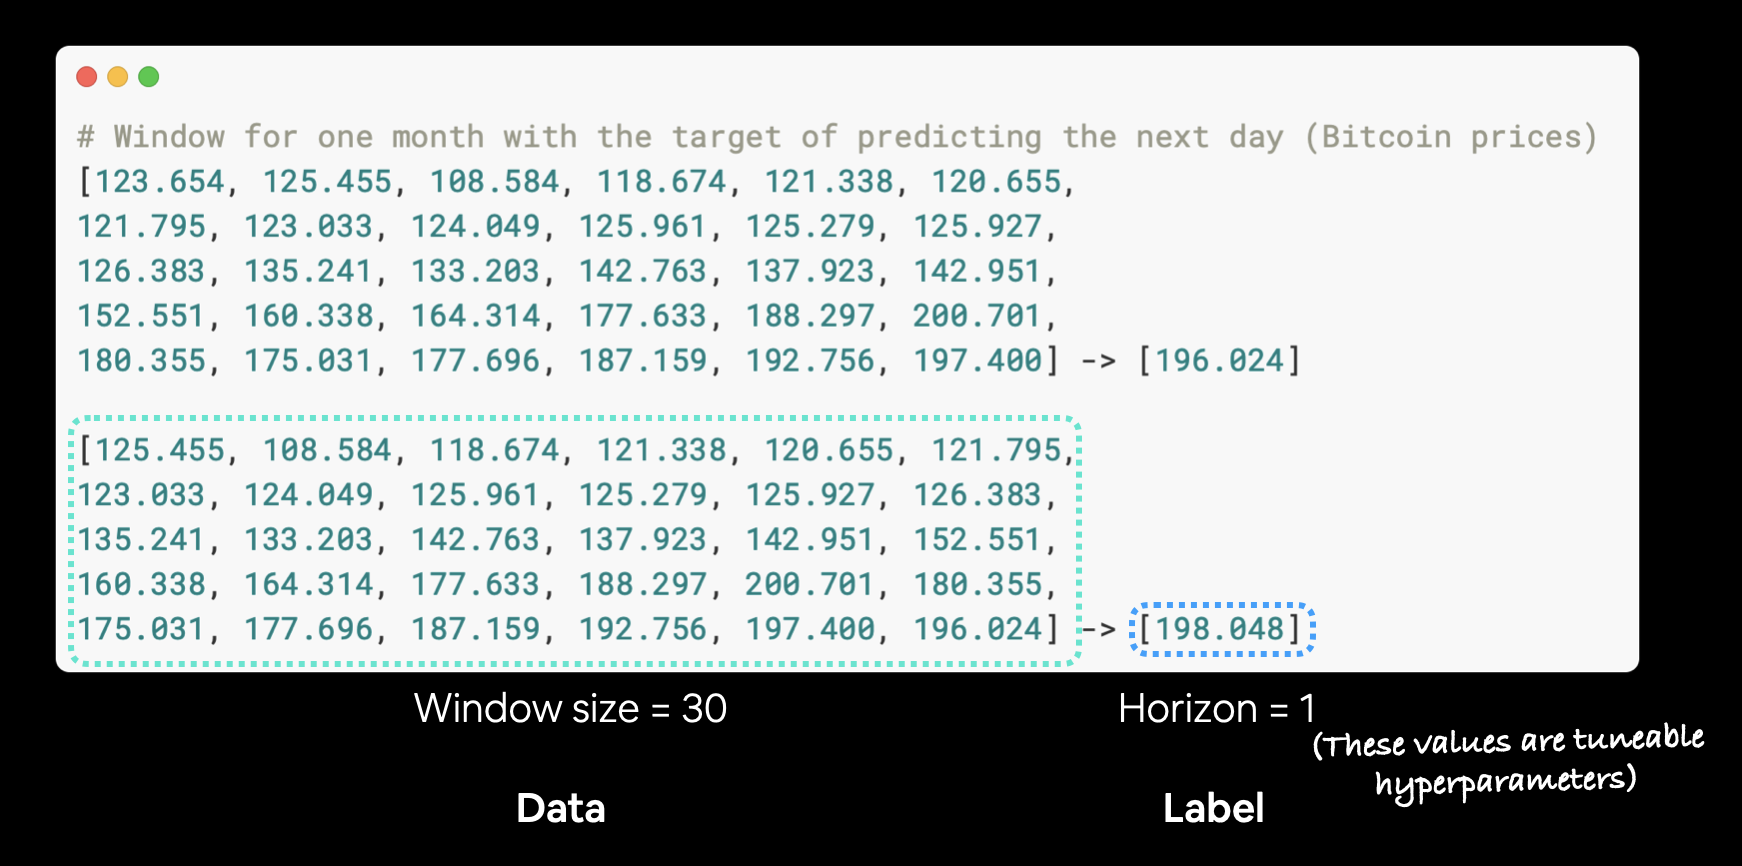

Example of Bitcoin prices windowed for 30 days to predict a horizon of 1.



🔑 Note: Recall from before, the window size (how many timesteps to use to fuel a forecast) and the horizon (how many timesteps to predict into the future) are hyperparameters. This means you can tune them to try and find values will result in better performance.

prepare datasets using the functions we created earlier.

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

Now let's construct model_2, a model with the same architecture as model_1 as well as the same training routine.

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [ ]:
 # Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 693.3010


693.3009643554688

How about we try loading in the best performing model_2 which was saved to file thanks to our ModelCheckpoint callback.

Excellent! Loading back in the best performing model see's a performance boost.

But let's not stop there, let's make some predictions with model_2 and then evaluate them just as we did before.

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 693.301,
 'mse': 1530006.2,
 'rmse': 1236.9342,
 'mape': 3.248922,
 'mase': 1.211897}

It looks like model_2 performs worse than the naïve model as well as model_1!

Does this mean a smaller window size is better? (I'll leave this as a challenge you can experiment with)

How do the predictions look?

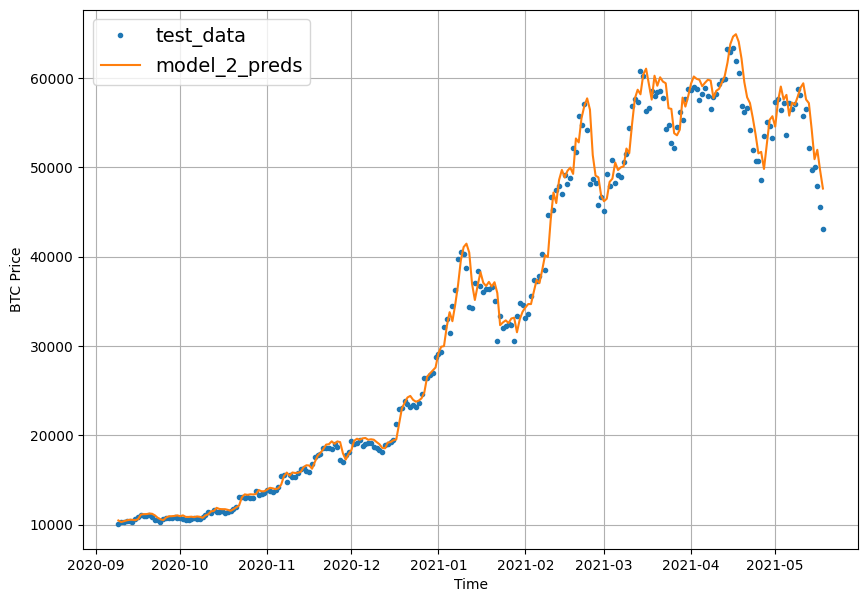

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")



# Model 3: Dense (window = 30, horizon = 7)

Let's try and predict 7 days ahead given the previous 30 days.

First, we'll update the HORIZON and WINDOW_SIZE variables and create windowed data.

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
#  split the full dataset windows into training and test sets.
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
# build, compile, fit and evaluate a model.

tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)


18/18 [==============================] - 0s 3ms/step - loss: 1341.9915


1341.991455078125

To compare apples to apples (best performing model to best performing model), we've got to load in the best version of model_3.

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1231.1346


1231.1346435546875

In this case, the error will be higher because we're predicting 7 steps at a time.

This makes sense though because the further you try and predict, the larger your error will be (think of trying to predict the weather 7 days in advance).

Let's make predictions with our model using the make_preds() function and evaluate them using the evaluate_preds() function.

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9281.013, 9477.327, 9150.395, 9436.455, 9422.153, 9445.195,
        9575.021],
       [9076.258, 9135.61 , 8899.437, 9052.786, 9174.81 , 9243.08 ,
        9428.531],
       [8869.993, 8977.386, 8689.075, 8758.286, 8879.657, 9192.094,
        9122.133],
       [8866.655, 9073.439, 8832.384, 8945.016, 8907.472, 9332.457,
        9181.305],
       [8759.704, 8788.151, 8895.644, 8836.372, 8917.594, 9048.394,
        9096.16 ]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 605.0078  ,  393.1031  ,  303.51953 ,  393.22363 ,  351.99442 ,
         479.0803  ,  501.57672 ,  556.9461  ,  539.84467 ,  547.62067 ,
         749.91583 ,  804.77765 ,  901.12244 ,  940.3975  ,  639.9101  ,
         198.85303 ,  172.8275  ,  262.7029  ,  296.2205  ,  313.13553 ,
         206.60414 ,  172.11635 ,  371.63504 ,  332.21664 ,  283.7839  ,
         129.36418 ,  167.00621 ,  181.06187 ,  214.73088 ,  189.7306  ,
         254.76897 ,  395.86118 ,  323.25934 ,  335.46463 ,  235.46031 ,
         256.762   ,  288.42752 ,  197.5157  ,  190.39342 ,  200.48703 ,
         479.24496 ,  121.34745 ,   82.1476  ,  112.11433 ,   91.51576 ,
         119.30245 ,   59.731236,  105.01618 ,  102.72628 ,  122.82513 ,
         119.1942  ,   83.2267  ,  208.47063 ,  122.42167 ,  260.45822 ,
         359.33426 ,  595.7984  ,  588.6304  ,  560.5339  ,  566.9912  ,
         411.0261  ,  286.90512 ,  264.91547 ,  421.75635 ,  409.20975 ,
         535.816   ,  428.80908 ,  575.7938 

## Make our evaluation function work for larger horizons

the outputs for model_3_results are multi-dimensional.

This is because the predictions are getting evaluated across the HORIZON timesteps (7 predictions at a time).

To fix this, let's adjust our evaluate_preds() function to work with multiple shapes of data.

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1231.1348,
 'mse': 5275039.0,
 'rmse': 1416.4888,
 'mape': 5.5430317,
 'mase': 2.1907353}

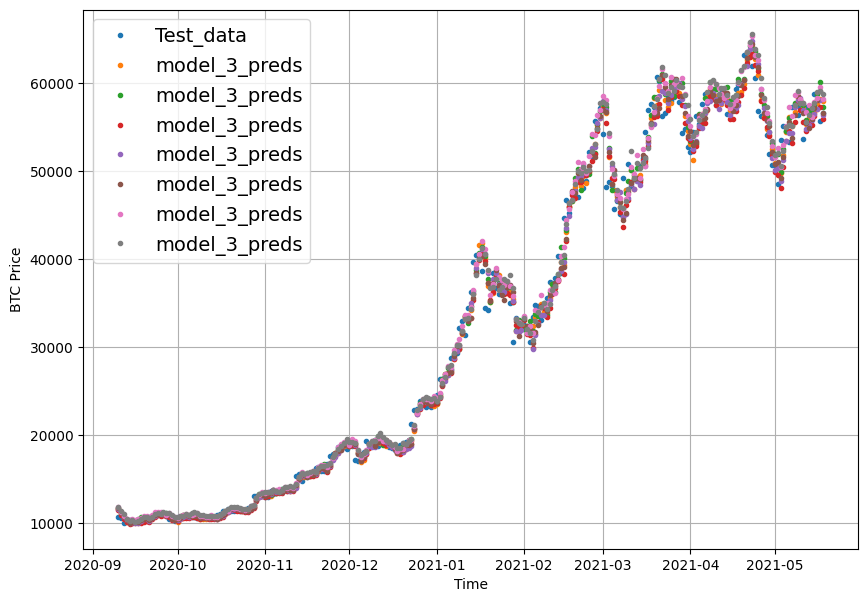

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


When we try to plot our multi-horizon predicts, we get a funky looking plot.

Again, we can fix this by aggregating our model's predictions.

🔑 Note: Aggregating the predictions (e.g. reducing a 7-day horizon to one value such as the mean) loses information from the original prediction. As in, the model predictions were trained to be made for 7-days but by reducing them to one, we gain the ability to plot them visually but we lose the extra information contained across multiple days.

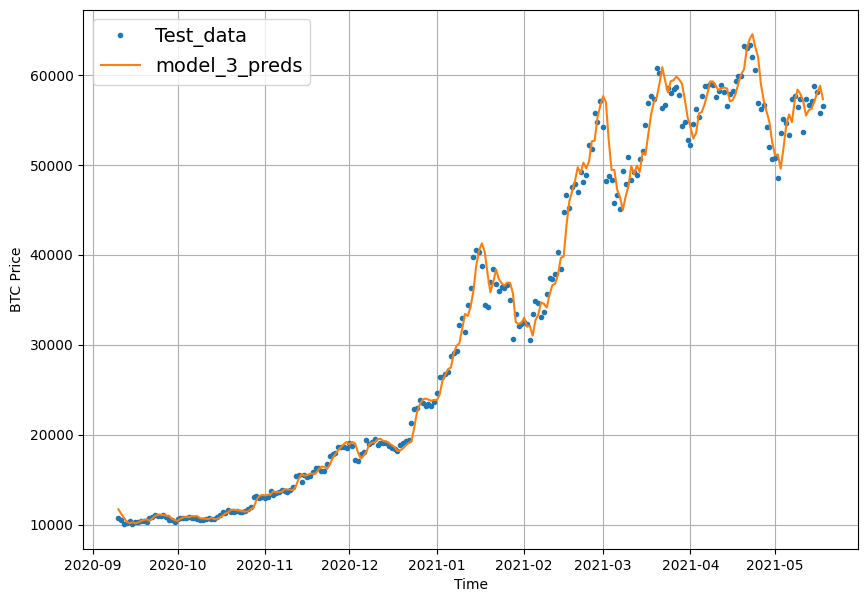

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")


## Which of our models is performing best so far?

So far, we've trained 3 models which use the same architecture but use different data inputs.

Let's compare them with the naïve model to see which model is performing the best so far.

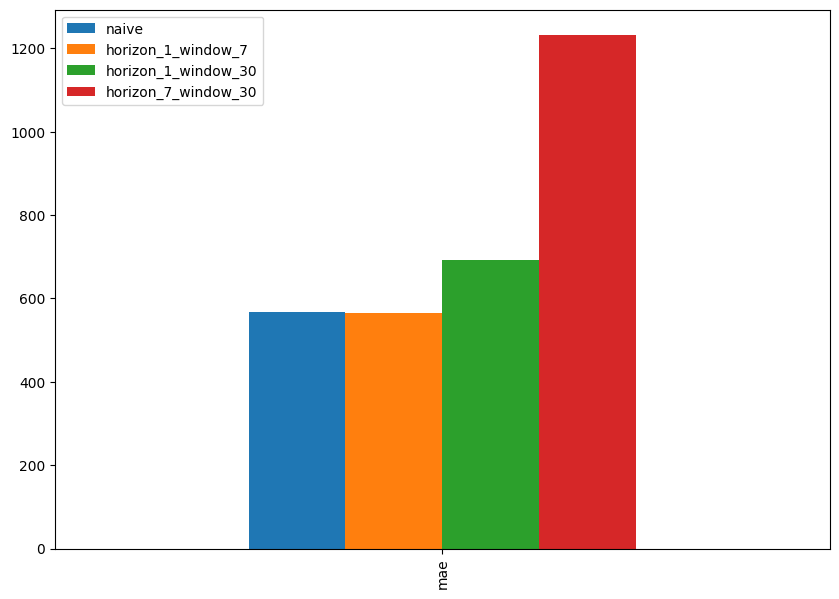

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


 our naïve model is performing best (it's very hard to beat a naïve model in open systems) but the dense model with a horizon of 1 and a window size of 7 looks to be performing cloest.

Because of this, let's use HORIZON=1 and WINDOW_SIZE=7 for our next series of modelling experiments (in other words, we'll use the previous week of Bitcoin prices to try and predict the next day).

🔑 Note: You might be wondering, why are the naïve results so good? One of the reasons could be due the presence of autocorrelation in the data. If a time series has autocorrelation it means the value at t+1 (the next timestep) is typically close to the value at t (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

📖 Resource: For more on how autocorrelation influences a model's predictions, see the article How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls by Vegard Flovik

# Model 4: Conv1D

This time, we'll be using a Conv1D model. Because as we saw in the sequence modelling notebook, Conv1D models can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

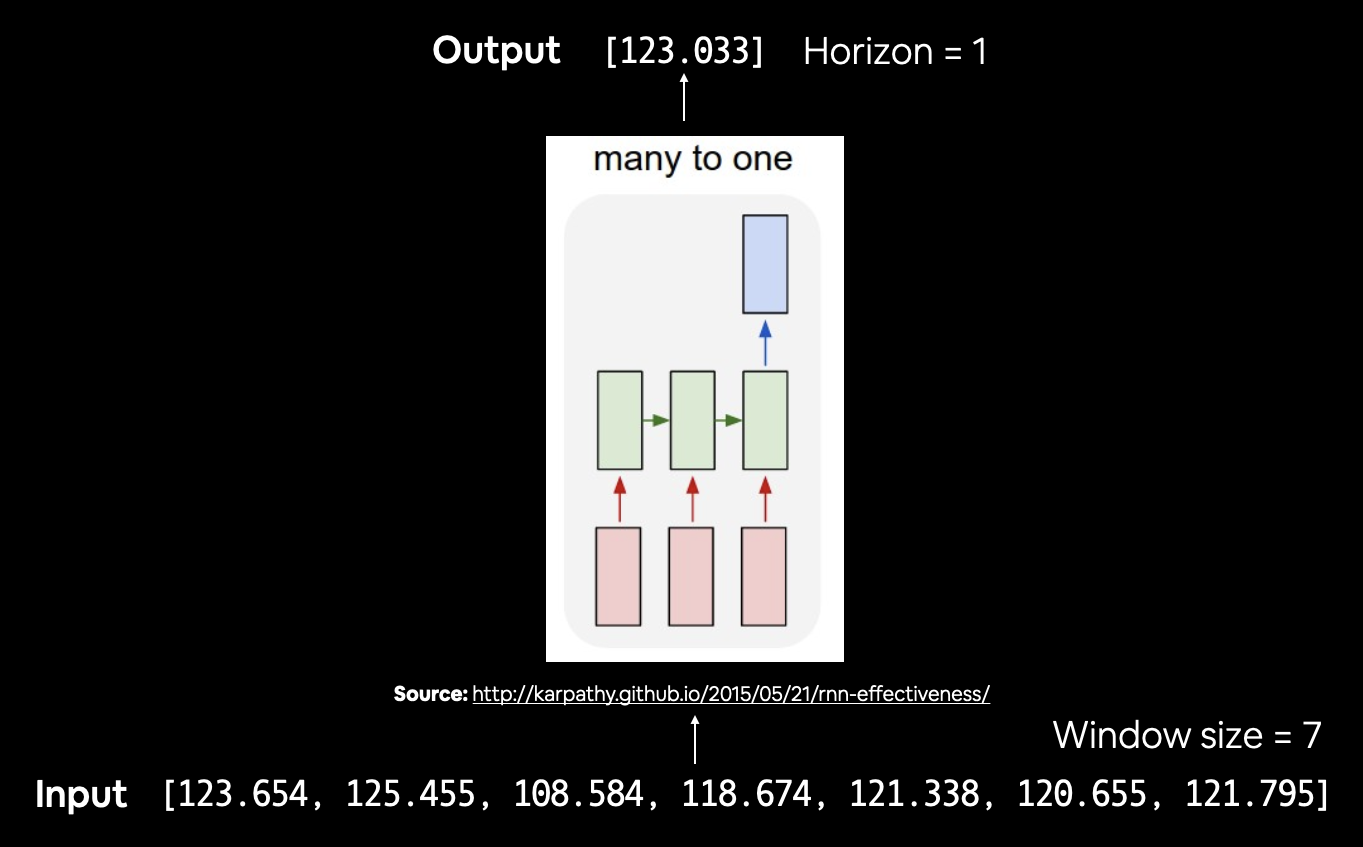

Framing Bitcoin forecasting in seq2seq (sequence to sequence) terms. Using a window size of 7 and a horizon of one results in a many to one problem. Using a window size of >1 and a horizon of >1 results in a many to many problem. The diagram comes from Andrei Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks.

Recreate our datasets.

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

Data windowed!

Now, since we're going to be using Conv1D layers, we need to make sure our input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: (batch_size, timesteps, input_dim).

In our case, the batch_size (by default this is 32 but we can change it) is handled for us but the other values will be:

* timesteps = WINDOW_SIZE - the timesteps is also often referred to as features, our features are the previous WINDOW_SIZE values of Bitcoin
* input_dim = HORIZON - our model views WINDOW_SIZE (one week) worth of data at a time to predict HORIZON (one day)

Right now, our data has the timesteps dimension ready but we'll have to adjust it to have the input_dim dimension.

In [ ]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

To fix this, we could adjust the shape of all of our train_windows or we could use a tf.keras.layers.Lamdba (called a Lambda layer) to do this for us in our model.

The Lambda layer wraps a function into a layer which can be used with a model.

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")


Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


Now we've got a Lambda layer, let's build, compile, fit and evaluate a Conv1D model on our data.

🔑 Note: If you run the model below without the Lambda layer, you'll get an input shape error (one of the most common errors when building neural networks).

In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])


In [ ]:
# lambda layer in summary
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


The Lambda layer appears the same as any other regular layer.

Now its time to evaluate Conv1D layer

In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 569.9959


569.9959106445312

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8905.992, 8804.878, 9009.963, 8806.111, 8760.115, 8749.799,
       8685.154, 8562.444, 8469.771, 8529.835], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 569.9959,
 'mse': 1188344.0,
 'rmse': 1090.1119,
 'mape': 2.5542858,
 'mase': 1.0013249}

# Model 5: RNN (LSTM)

we can also use a recurrent neural network to model our sequential time series data.

📖 Resource: For more on the different types of recurrent neural networks you can use for sequence problems, see the Recurrent Neural Networks section of notebook 08.

Let's reuse the same data we used for the Conv1D model, except this time we'll create an LSTM-cell powered RNN to model our Bitcoin data.

Once again, one of the most important steps for the LSTM model will be getting our data into the right shape.

The tf.keras.layers.LSTM() layer takes a tensor with [batch, timesteps, feature] dimensions.

As mentioned earlier, the batch dimension gets taken care of for us but our data is currently only has the feature dimension (WINDOW_SIZE).

To fix this, just like we did with the Conv1D model, we can use a tf.keras.layers.Lambda() layer to adjust the shape of our input tensors to the LSTM layer.

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 584.1823


584.1823120117188

In [ ]:
# Make predictions with our LSTM model (model 5)
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8936.633, 8819.987, 8975.384, 8773.733, 8766.378, 8752.086,
       8686.292, 8548.367, 8483.078, 8514.493], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 584.1823,
 'mse': 1223016.1,
 'rmse': 1105.9006,
 'mape': 2.6257746,
 'mase': 1.0262465}

Hmmm... it seems even with an LSTM-powered RNN we weren't able to beat our naïve models results.

Perhaps adding another variable will help?

🔑 Note: I'm putting this here again as a reminder that because neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results. You're probably starting to clue onto this now.

## Make a multivariate time series

So far all of our models have barely kept up with the naïve forecast.

And so far all of them have been trained on a single variable (also called univariate time series): the historical price of Bitcoin.

If predicting the price of Bitcoin using the price of Bitcoin hasn't worked out very well, maybe giving our model more information may help.

More information is a vague term because we could actually feed almost anything to our model(s) and they would still try to find patterns.

For example, we could use the historical price of Bitcoin as well as anyone with the name Daniel Bourke Tweeted on that day to predict the future price of Bitcoin.

But would this help?

Porbably not.

What would be better is if we passed our model something related to Bitcoin (again, this is quite vauge, since in an open system like a market, you could argue everything is related).

This will be different for almost every time series you work on but in our case, we could try to see if the Bitcoin block reward size adds any predictive power to our model(s).

What is the Bitcoin block reward size?

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

At its inception, the Bitcoin block reward size was 50.

But every four years or so, the Bitcoin block reward halves.

For example, the block reward size went from 50 (starting January 2009) to 25 on November 28 2012.

Let's encode this information into our time series data and see if it helps a model's performance.

🔑 Note: Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from univariate (only the historical price of Bitcoin) to multivariate (the price of Bitcoin as well as the block reward size).

In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

 time to add another feature column, the block reward size.

First, we'll need to create variables for the different block reward sizes as well as the dates they came into play.

The following block rewards and dates were sourced from [cmcmarkets.com.](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving)


|Block Reward|	Start Date|
|------------|------------|
|50|	3 January 2009 (2009-01-03)|
|25|	28 November 2012|
|12.5|	9 July 2016|
|6.25|	11 May 2020|
|3.125|	TBA (expected 2024)|
|1.5625|	TBA (expected 2028)|

🔑 Note: Since our Bitcoin historical data starts from 01 October 2013, none of the timesteps in our multivariate time series will have a block reward of 50.

In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


We're going to get the days (indexes) for different block reward values.

This is important because if we're going to use multiple variables for our time series, they have to the same frequency as our original variable. For example, if our Bitcoin prices are daily, we need the block reward values to be daily as well.

🔑 Note: For using multiple variables, make sure they're the same frequency as each other. If your variables aren't at the same frequency (e.g. Bitcoin prices are daily but block rewards are weekly), you may need to transform them in a way that they can be used with your model.

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

Now we can add another feature to our dataset block_reward (this gets lower over time so it may lead to increasing prices of Bitcoin).

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

Price block_reward
Date                              
2013-10-01  123.65499           25
2013-10-02  125.45500           25
2013-10-03  108.58483           25
2013-10-04  118.67466           25
2013-10-05  121.33866           25

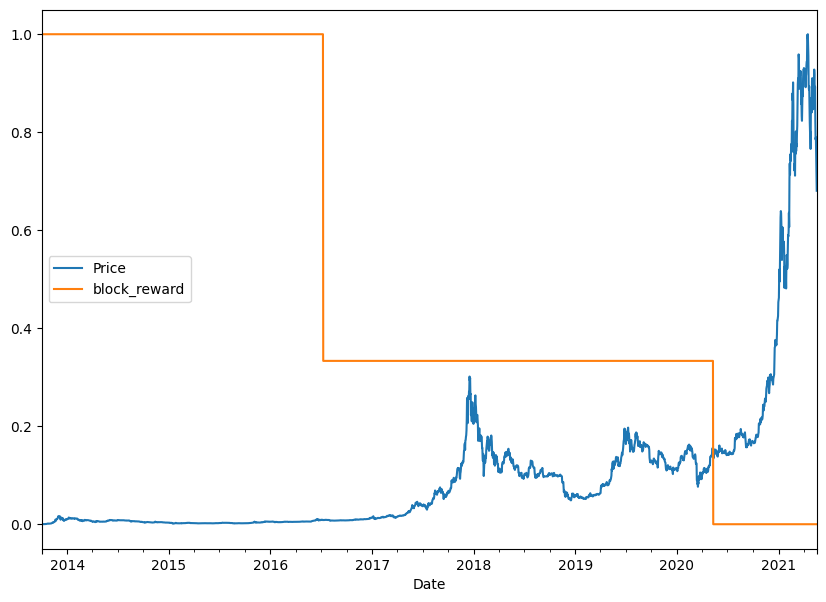

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

When we scale the block reward and the Bitcoin price, we can see the price goes up as the block reward goes down, perhaps this information will be helpful to our model's performance.

## Making a windowed dataset with pandas

Previously, we used some custom made functions to window our univariate time series.

However, since we've just added another variable to our dataset, these functions won't work.

Not to worry though. Since our data is in a pandas DataFrame, we can leverage the pandas.DataFrame.shift() method to create a windowed multivariate time series.

The shift() method offsets an index by a specified number of periods.

Let's see it in action.

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   
2013-10-06  120.65533           25  121.33866  118.67466  108.58483   
2013-10-07  121.79500           25  120.65533  121.33866  118.67466   
2013-10-08  123.03300           25  121.79500  120.65533  121.33866   
2013-10-09  124.04900           25  123.03300  121.79500  120.65533   
2013-10-10  125.96116           25  124.04900  123.03300  121.79500   

              Price+4    Price+5    Price+6    Price+7  
Date                                                    
2013-10-01        NaN        NaN        NaN        NaN  
2013-10-02        NaN        NaN        NaN        NaN  
2013-10-03        NaN        NaN        NaN        NaN  
2013-10-04        NaN        NaN        NaN        NaN  
2013-10-05  123.65499        NaN        NaN        NaN  
2013-10-06  125.45500  123.65499        NaN        NaN  
2013-10-07  108.58483  125.45500  123.65499        NaN  
2013-10-08  118.67466  108.58483  125.45500  123.65499  
2013-10-09  121.33866  118.67466  108.58483  125.45500  
2013-10-10  120.65533  121.33866  118.67466  108.58483

Now that we've got a windowed dataset, let's separate features (X) from labels (y).

Remember in our windowed dataset, we're trying to use the previous WINDOW_SIZE steps to predict HORIZON steps.

Window for a week (7) to predict a horizon of 1 (multivariate time series)
WINDOW_SIZE & block_reward -> HORIZON


```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

We'll also remove the NaN values using pandas dropna() method, this equivalent to starting our windowing function at sample 0 (the first sample) + WINDOW_SIZE.

In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

block_reward     Price+1     Price+2     Price+3     Price+4  \
Date                                                                       
2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   

               Price+5     Price+6     Price+7  
Date                                            
2013-10-08  108.584831  125.455002  123.654991  
2013-10-09  118.674660  108.584831  125.455002  
2013-10-10  121.338661  118.674660  108.584831  
2013-10-11  120.655327  121.338661  118.674660  
2013-10-12  121.794998  120.655327  121.338661

In [ ]:
# View labels
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

let's split it into train and test sets using an 80/20 split just as we've done before.

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Training and test multivariate time series datasets made! Time to build a model.

# Model 6: Dense (multivariate time series)

To keep things simple, let's the model_1 architecture and use it to train and make predictions on our multivariate time series data.

By replicating the model_1 architecture we'll be able to see whether or not adding the block reward feature improves or detracts from model performance.

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Multivariate model fit!

You might've noticed that the model inferred the input shape of our data automatically (the data now has an extra feature). Often this will be the case, however, if you're running into shape issues, you can always explicitly define the input shape using input_shape parameter of the first layer in a model.

Time to evaluate our multivariate model.

In [ ]:

# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)


18/18 [==============================] - 0s 2ms/step - loss: 567.8468


567.8468017578125

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8880.369, 8785.938, 9029.679, 8805.54 , 8735.286, 8725.963,
       8715.407, 8517.903, 8467.613, 8533.077], dtype=float32)>

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.84674,
 'mse': 1169144.2,
 'rmse': 1081.2698,
 'mape': 2.5436974,
 'mase': 0.9975494}

how do these results compare to model_1 (same window size and horizon but without the block reward feature)?

In [ ]:
model_1_results

{'mae': 564.17957,
 'mse': 1153095.1,
 'rmse': 1073.8226,
 'mape': 2.511514,
 'mase': 0.9911072}

It looks like the adding in the block reward may have helped our model slightly.

But there a few more things we could try.

📖 Resource: For different ideas on how to improve a neural network model (from a model perspective), refer to the Improving a model section in notebook 02.

🛠 Exercise(s):

Try adding an extra tf.keras.layers.Dense() layer with 128 hidden units to model_6, how does this effect model performance?
Is there a better way to create this model? As in, should the block_reward feature be bundled in with the Bitcoin historical price feature? Perhaps you could test whether building a multi-input model (e.g. one model input for Bitcoin price history and one model input for block_reward) works better? See Model 4: Hybrid embedding section of notebook 09 for an idea on how to create a multi-input model.

# Model 7: N-BEATS algorithm

Time to step things up a notch.

So far we've tried a bunch of smaller models, models with only a couple of layers.

But one of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the M4 competition (a forecasting competition).

For our next modelling experiment we're going to be replicating the generic architecture of the N-BEATS algorithm (see section 3.3 of the N-BEATS paper).

We're not going to go through all of the details in the paper, instead we're going to focus on:

1. Replicating the model architecture in Figure 1 of the N-BEATS paper

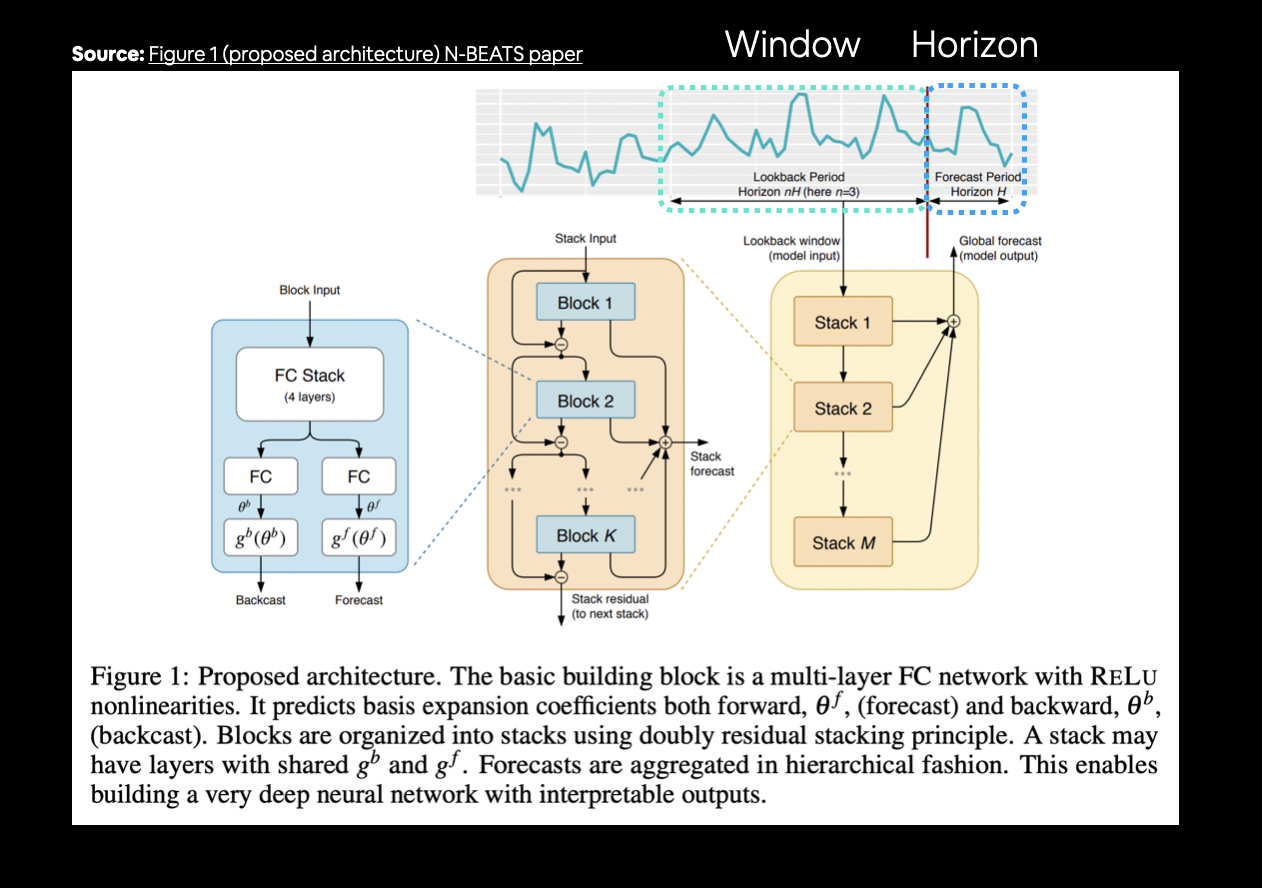

N-BEATS algorithm we're going to replicate with TensorFlow with window (input) and horizon (output) annotations.

2. Using the same hyperparameters as the paper which can be found in Appendix D of the N-BEATS paper

Doing this will give us an opportunity to practice:

* Creating a custom layer for the NBeatsBlock by subclassing tf.keras.layers.Layer
* Creating a custom layer is helpful for when TensorFlow doesn't already have
an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times (e.g. like a stack of N-BEATS blocks)
* Implementing a custom architecture using the Functional API
* Finding a paper related to our problem and seeing how it goes

🔑 Note: As you'll see in the paper, the authors state “N-BEATS is implemented and trained in TensorFlow”, that's what we'll be doing too!

## Building and testing an N-BEATS block layer

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Setting up the NBeatsBlock custom layer we see:

* The class inherits from tf.keras.layers.Layer (this gives it all of the methods assosciated with tf.keras.layers.Layer)
* The constructor (def __init__(...)) takes all of the layer hyperparameters as well as the **kwargs argument
* The **kwargs argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, input_shape, trainable and name
* In the constructor, the block architecture layers are created:
* The hidden layers are created as a stack of fully connected with n_nuerons hidden units layers with ReLU activation
* The theta layer uses theta_size hidden units as well as linear activation
* The call() method is what is run when the layer is called:
* It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)
* After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: input_size) and forecast (forward predictions, shape: horizon) are returned

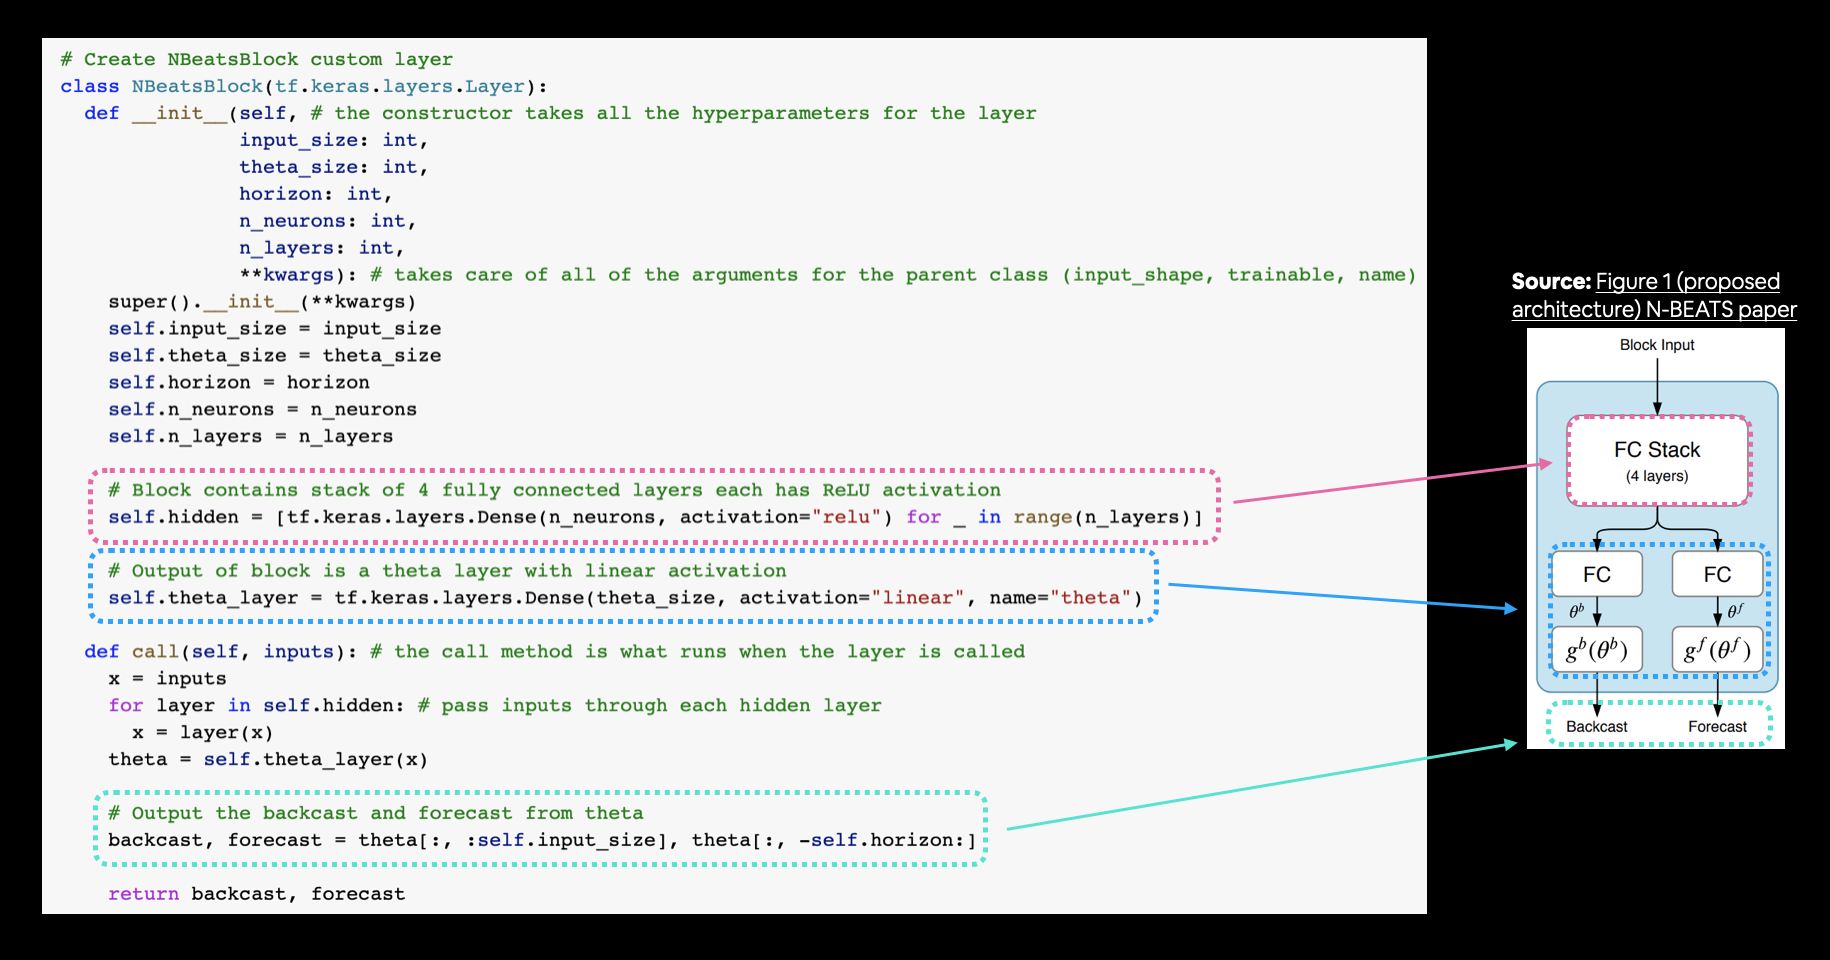

Using TensorFlow layer subclassing to replicate the N-BEATS basic block. See section 3.1 of N-BEATS paper for details.

Let's see our block replica in action by together by creating a toy version of NBeatsBlock.

📖 Resource: Much of the creation of the time series materials (the ones you're going through now), including replicating the N-BEATS algorithm were streamed live on Twitch. If you'd like to see replays of how the algorithm was replicated, check out the Time series research and TensorFlow course material creation playlist on the Daniel Bourke arXiv YouTube channel.

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)


In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs


<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [-0.01676667  0.22745682 -0.22912288 -0.7394616  -1.1297575  -0.0101669
  0.20693822]
Forecast: -0.04952262341976166


## Preparing data for the N-BEATS algorithm using tf.data

We've got the basic building block for the N-BEATS architecture ready to go.

But before we use it to replicate the entire N-BEATS generic architecture, let's create some data.

This time, because we're going to be using a larger model architecture, to ensure our model training runs as fast as possible, we'll setup our datasets using the tf.data API.

And because the N-BEATS algorithm is focused on univariate time series, we'll start by making training and test windowed datasets of Bitcoin prices (just as we've done above).

In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

# Create NBEATS data inputs (NBEATS works with univariate time series)
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()


Price    Price+1    Price+2    Price+3    Price+4    Price+5  \
Date                                                                           
2013-10-08  123.03300  121.79500  120.65533  121.33866  118.67466  108.58483   
2013-10-09  124.04900  123.03300  121.79500  120.65533  121.33866  118.67466   
2013-10-10  125.96116  124.04900  123.03300  121.79500  120.65533  121.33866   
2013-10-11  125.27966  125.96116  124.04900  123.03300  121.79500  120.65533   
2013-10-12  125.92750  125.27966  125.96116  124.04900  123.03300  121.79500   

              Price+6    Price+7  
Date                              
2013-10-08  125.45500  123.65499  
2013-10-09  108.58483  125.45500  
2013-10-10  118.67466  108.58483  
2013-10-11  121.33866  118.67466  
2013-10-12  120.65533  121.33866

In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

Train and test sets ready to go!

Now let's convert them into TensorFlow tf.data.Dataset's to ensure they run as fast as possible whilst training.

We'll do this by:

1. Turning the arrays in tensor Datasets using tf.data.Dataset.from_tensor_slices()
* Note: from_tensor_slices() works best when your data fits in memory, for extremely large datasets, you'll want to look into using the TFRecord format
2. Combine the labels and features tensors into a Dataset using tf.data.Dataset.zip()
3. Batch and prefetch the Datasets using batch() and prefetch()
* Batching and prefetching ensures the loading time from CPU (preparing data) to GPU (computing on data) is as small as possible

📖 Resource: For more on building highly performant TensorFlow data pipelines, I'd recommend reading through the Better performance with the tf.data API guide.

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

Data prepared! Notice the input shape for the features (None, 7), the None leaves space for the batch size where as the 7 represents the WINDOW_SIZE.

Time to get create the N-BEATS architecture.

## Setting up hyperparameters for N-BEATS algorithm

we'll create variables for each of the hyperparameters we'll be using for our N-BEATS replica.

📖 Resource: The following hyperparameters are taken from Figure 1 and Table 18/Appendix D of the N-BEATS paper.

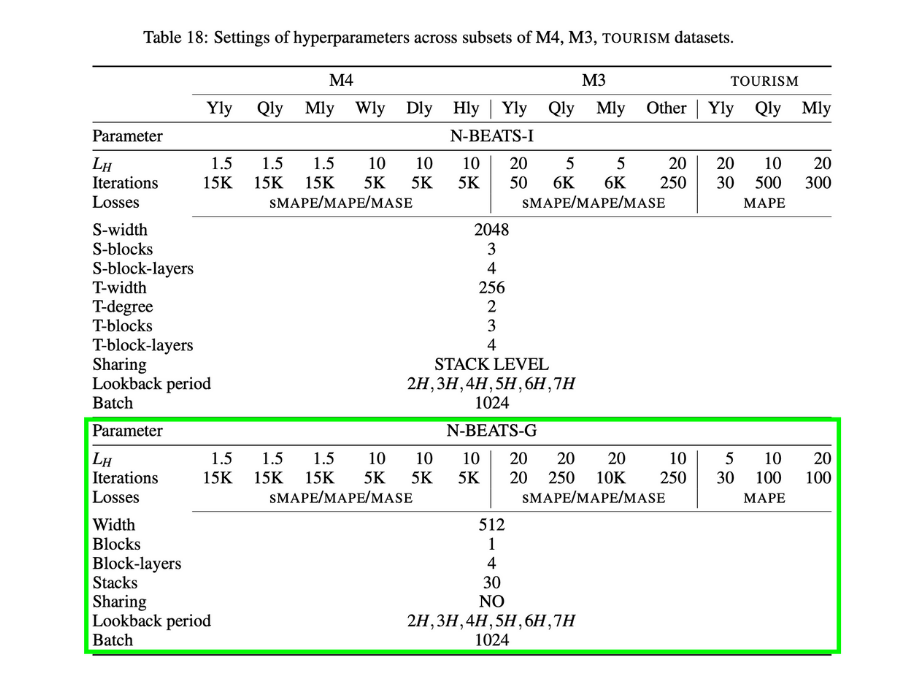

Table 18 from N-BEATS paper describing the hyperparameters used for the different variants of N-BEATS. We're using N-BEATS-G which stands for the generic version of N-BEATS.

🔑 Note: If you see variables in a machine learning example in all caps, such as "N_EPOCHS = 100", these variables are often hyperparameters which are used through the example. You'll usually see them instantiated towards the start of an experiment and then used throughout.

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

Beautiful! Hyperparameters ready, now before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS double residual stacking (section 3.2 of the N-BEATS paper) possible:

* tf.keras.layers.subtract(inputs) - subtracts list of input tensors from each other
* tf.keras.layers.add(inputs) - adds list of input tensors to each other

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, compiling and fitting the N-BEATS algorithm

Okay, we've finally got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm.

We'll do so by going through the following:

1. Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use a for loop to create stacks of block layers
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using tf.keras.Model()
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
* tf.keras.callbacks.EarlyStopping() - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
* tf.keras.callbacks.ReduceLROnPlateau() - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])



Epoch 153: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 253: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 37s, sys: 2.07 s, total: 1min 39s
Wall time: 1min 41s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 571.9122 - mae: 571.9122 - mse: 1169238.5000


[571.9121704101562, 571.9121704101562, 1169238.5]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8849.096 , 8814.513 , 8978.445 , 8751.461 , 8759.67  , 8689.096 ,
       8669.406 , 8535.875 , 8444.0625, 8494.422 ], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 571.9122,
 'mse': 1169238.5,
 'rmse': 1081.3134,
 'mape': 2.5805333,
 'mase': 1.0046912}

## Plotting the N-BEATS architecture we've created

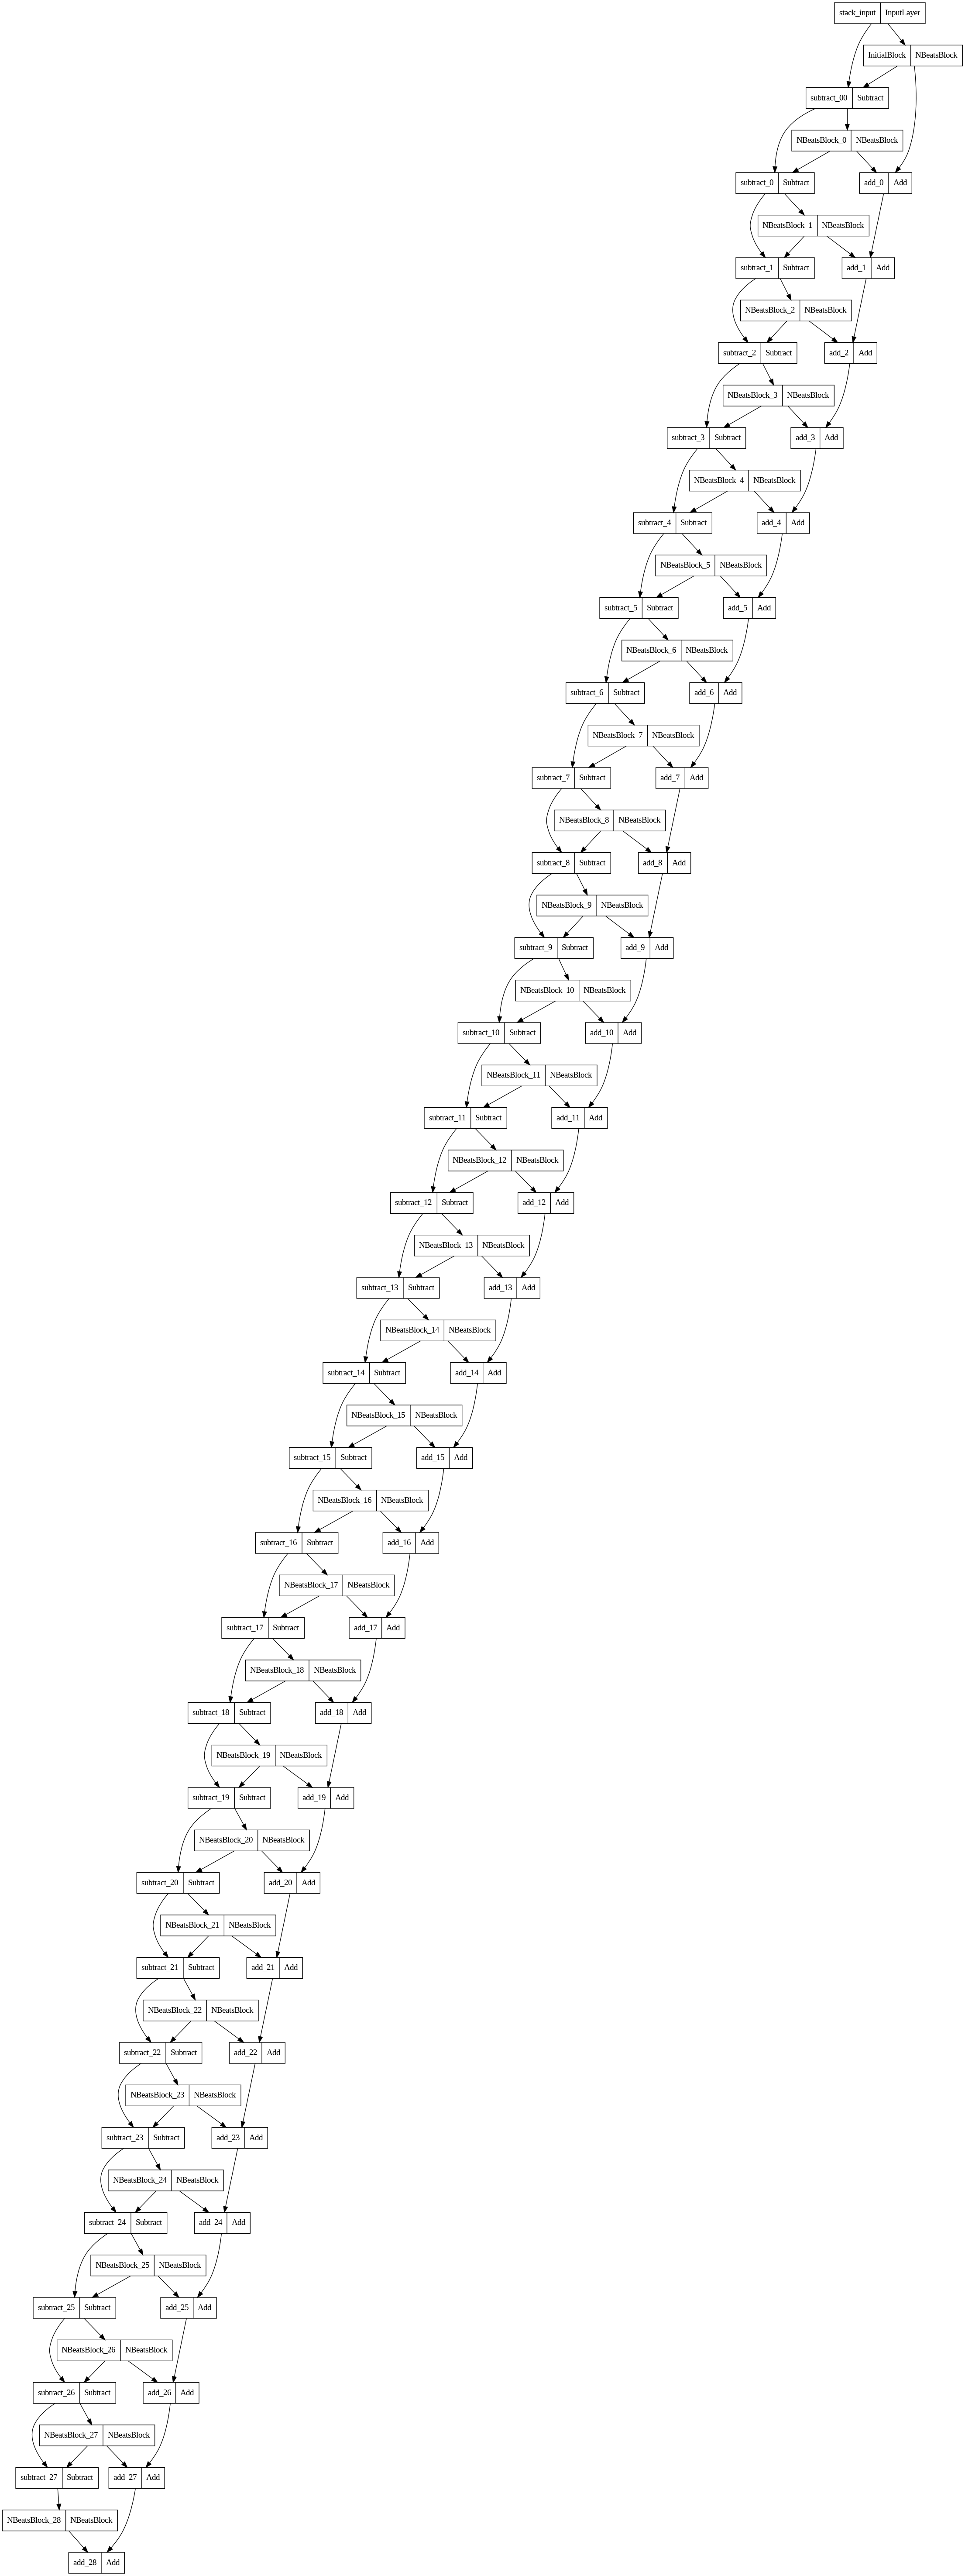

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

It looks similar to the model shown in Figure 1 of the N-BEATS paper.

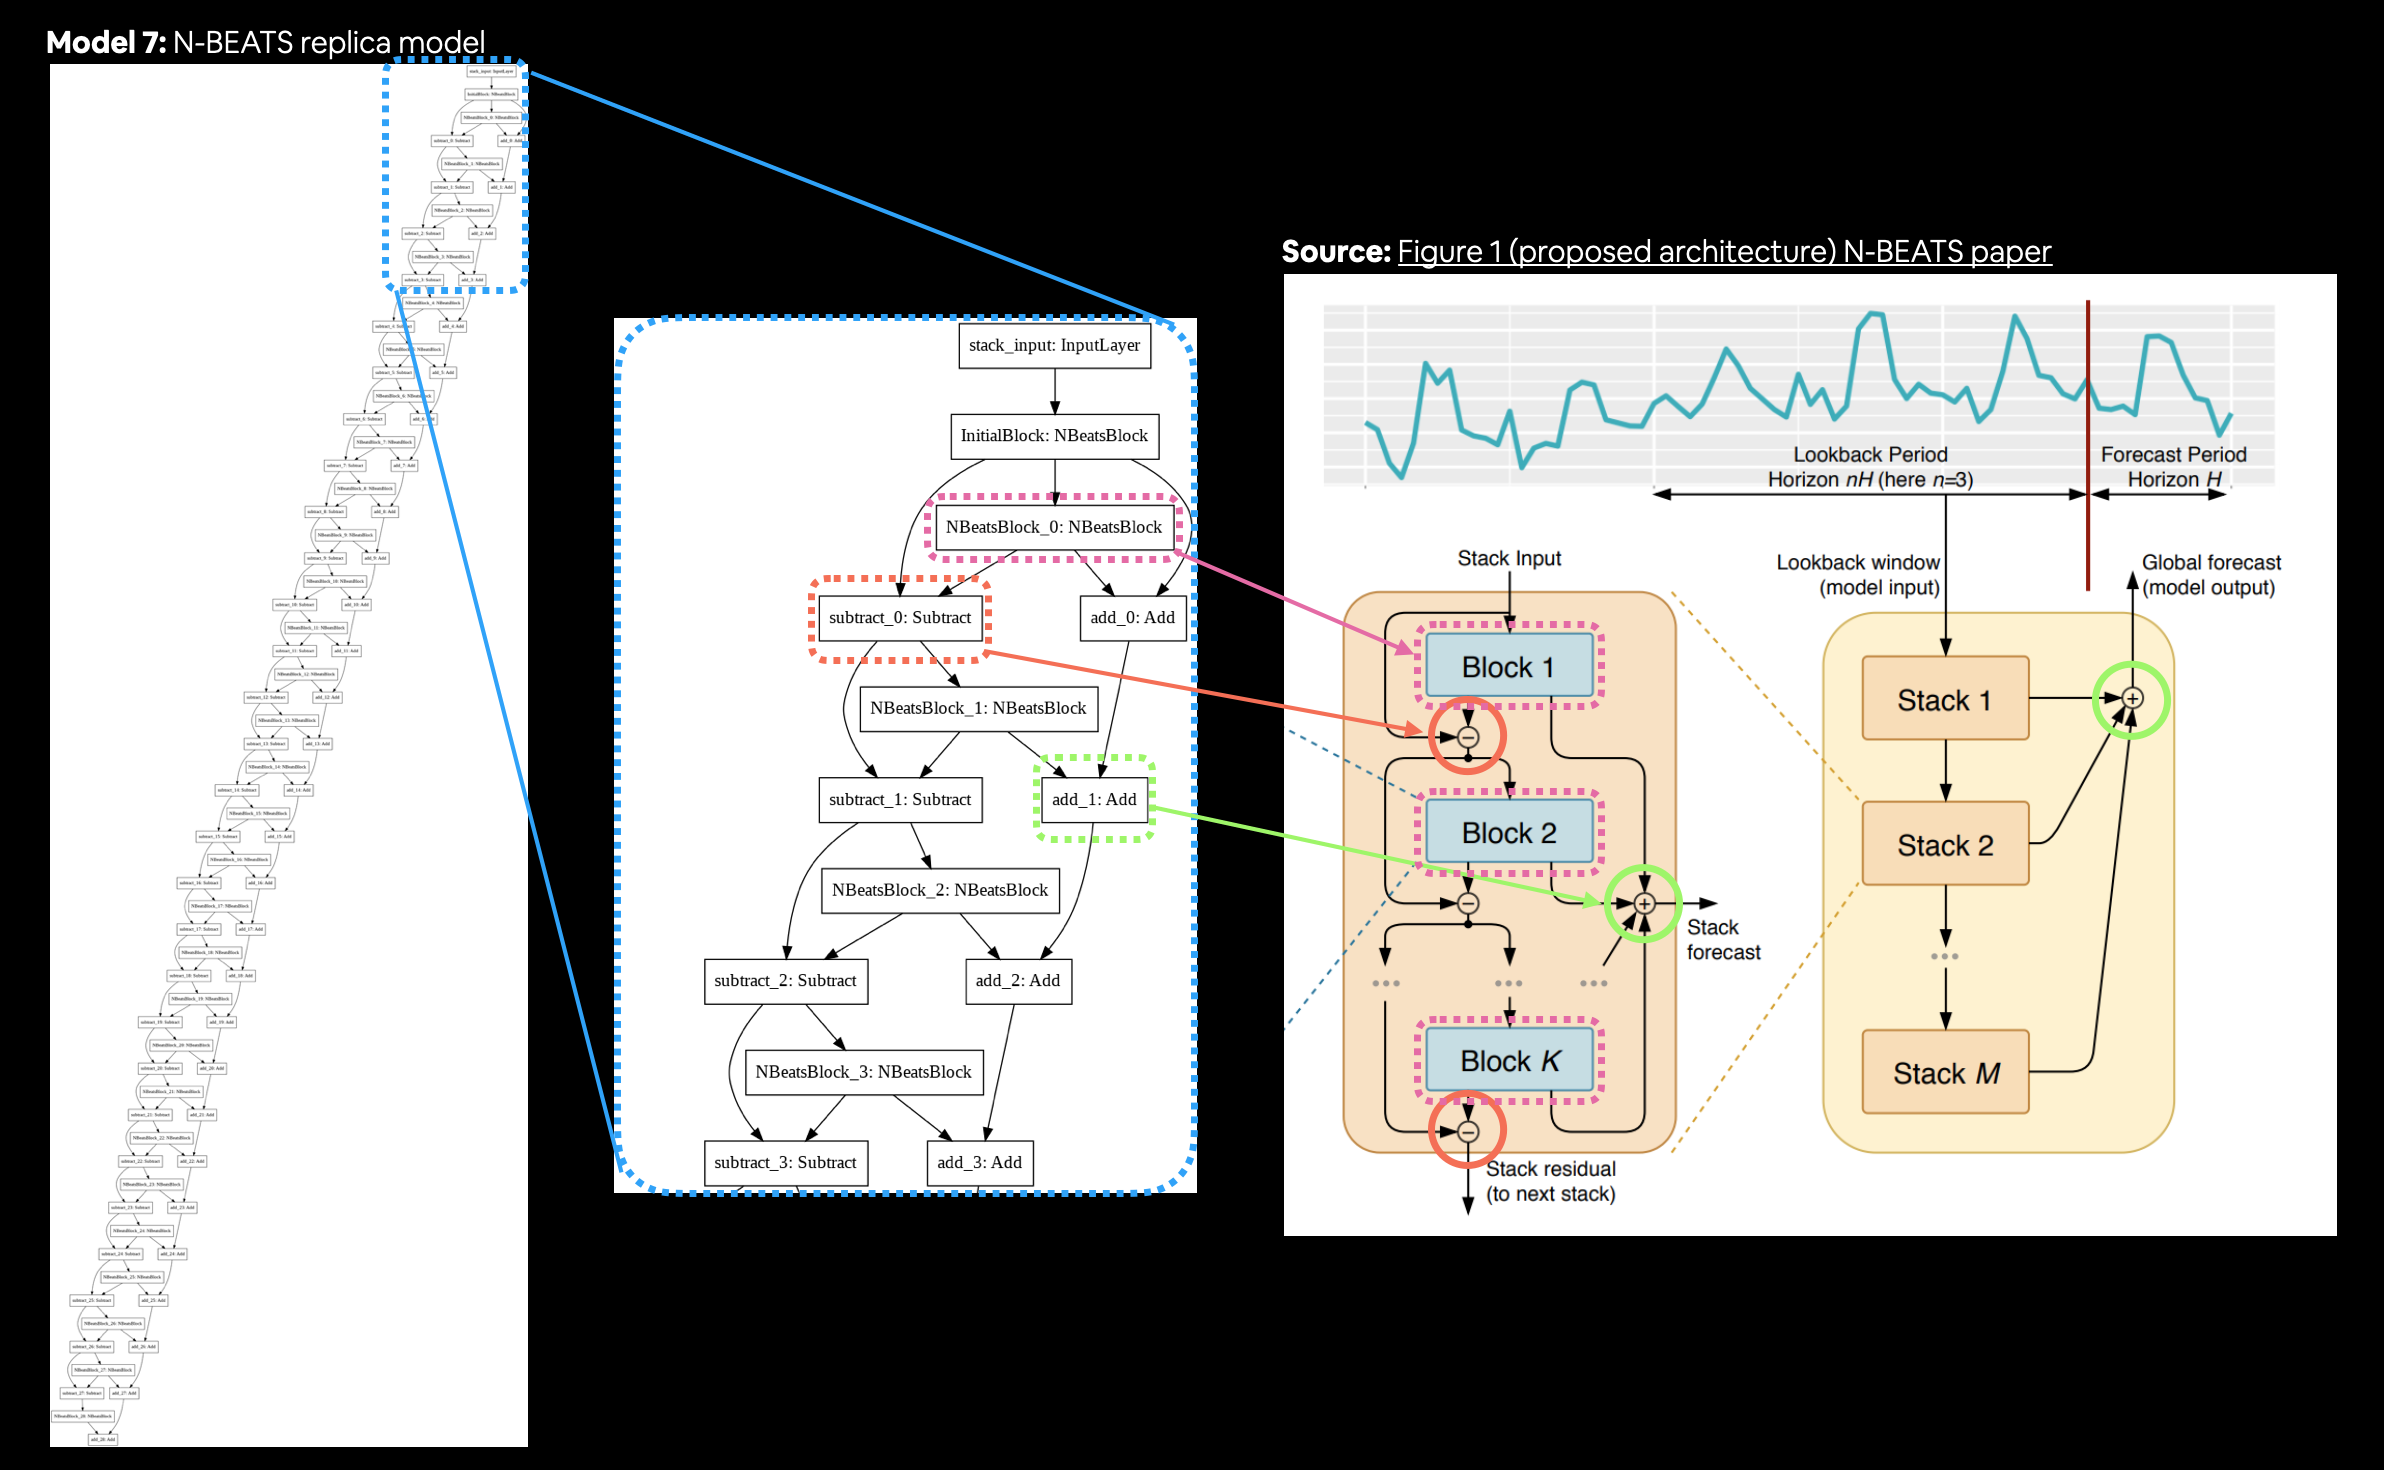
Comparison of model_7 (N-BEATS replica model make with Keras Functional API) versus actual N-BEATS architecture diagram.

try and save our version of the N-BEATS model

In [ ]:
# This will error out unless a "get_config()" method is implemented - this could be extra curriculum
model_7.save(model_7.name)

a warning appears telling us to fully save our model correctly we need to implement a get_config() method in our custom layer class.

📖 Resource: If you would like to save and load the N-BEATS model or any other custom or subclassed layer/model configuration, you should overwrite the get_config() and optionally from_config() methods. See the TensorFlow Custom Objects documentation for more.

# Model 8: Creating an ensemble (stacking different models together)

For example, in the N-BEATS paper, they trained an ensemble of models (180 in total, see section 3.4) to achieve the results they did using a combination of:

* Different loss functions (sMAPE, MASE and MAPE)
* Different window sizes (2 x horizon, 3 x horizon, 4 x horizon...)
The benefit of ensembling models is you get the "decision of the crowd effect". Rather than relying on a single model's predictions, you can take the average or median of many different models.

The keyword being: different.

It wouldn't make sense to train the same model 10 times on the same data and then average the predictions.

Fortunately, due to their random initialization, even deep learning models with the same architecture can produce differe nt results.

What I mean by this is each time you create a deep learning model, it starts with random patterns (weights & biases) and then it adjusts these random patterns to better suit the dataset it's being trained on.

However, the process it adjusts these patterns is often a form of guided randomness as well (the SGD optimizer stands for stochastic or random gradient descent).

To create our ensemble models we're going to be using a combination of:

* Different loss functions (MAE, MSE, MAPE)
* Randomly initialized models

Essentially, we'll be creating a suite of different models all attempting to model the same data.

And hopefully the combined predictive power of each model is better than a single model on its own.

Let's find out!

We'll start by creating a function to produce a list of different models trained with different loss functions. Each layer in the ensemble models will be initialized with a random normal (Gaussian) distribution using He normal initialization, this'll help estimating the prediction intervals later on.

🔑 Note: In your machine leanring experiments, you may have already dealt with examples of ensemble models. Algorithms such as the random forest model are a form of ensemble, it uses a number of randomly created decision trees where each individual tree may perform poorly but when combined gives great results.*

## Constructing and fitting an ensemble of models (using different loss functions)

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

Ensemble model creator function created!

Let's try it out by running num_iter=5 runs for 1000 epochs. This will result in 15 total models (5 for each different loss function).

Of course, these numbers could be tweaked to create more models trained for longer.

🔑 Note: With ensembles, you'll generally find more total models means better performance. However, this comes with the tradeoff of having to train more models (longer training time) and make predictions with more models (longer prediction time).

In [ ]:

%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 267: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 682: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 782: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 427: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 527: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 220: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 620: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 720: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by redu

## Making predictions with an ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8831.126,  8775.883,  9016.625, ..., 50291.164, 48562.176,
        46415.457],
       [ 8768.511,  8746.567,  9051.09 , ..., 49813.29 , 48345.387,
        46190.805],
       [ 8803.674,  8814.329,  9024.09 , ..., 49997.387, 48431.645,
        45874.59 ],
       ...,
       [ 8684.995,  8810.539,  9027.286, ..., 49874.63 , 48232.85 ,
        46068.062],
       [ 8817.914,  8772.106,  9032.803, ..., 49244.87 , 48715.434,
        46318.19 ],
       [ 8805.947,  8793.462,  9084.032, ..., 49923.516, 48235.457,
        46028.566]], dtype=float32)>

since we've trained 15 models, there's going to be 15 sets of predictions. Rather than comparing every set of predictions to the ground truth, let's take the median (you could also take the mean too but the median is usually more robust than the mean).

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 567.5343,
 'mse': 1144320.2,
 'rmse': 1069.729,
 'mape': 2.5716994,
 'mase': 0.9970006}

## Plotting the prediction intervals (uncertainty estimates) of our ensemble

One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:

1. Take the predictions from a number of randomly initialized models (we've got this thanks to our ensemble model)
2. Measure the standard deviation of the predictions
3. Multiply standard deviation by 1.96 (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1)

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)


Wonderful, now we've got the upper and lower bounds for the the 95% prediction interval, let's plot them against our ensemble model's predictions.

To do so, we can use our plotting function as well as the matplotlib.pyplot.fill_between() method to shade in the space between the upper and lower bounds.

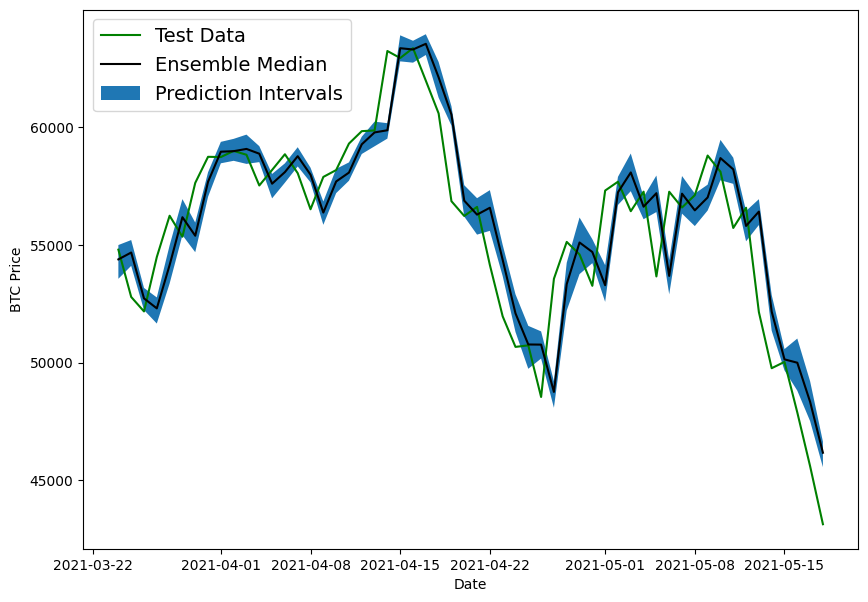

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);



We've just plotted:

* The test data (the ground truth Bitcoin prices)
* The median of the ensemble predictions
* The 95% prediction intervals (assuming the data is Gaussian/normal, the model is saying that 95% of the time, predicted value should fall between this range)
What can you tell about the ensemble model from the plot above?

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be overfitting the data, meaning it's basically replicating what a naïve model would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

🔑 Note: Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian. We'll see this later on with the turkey problem 🦃. For further reading on this topic, I'd recommend reading The Black Swan by Nassim Nicholas Taleb, especially Part 2 and Chapter 15.

## Aside: two types of uncertainty (coconut and subway)

Inheritly, you know you cannot predict the future.

That doesn't mean trying to isn't valuable.

For many things, future predictions are helpful. Such as knowing the bus you're trying to catch to the library leaves at 10:08am. The time 10:08am is a point prediction, if the bus left at a random time every day, how helpful would it be?

Just like saying the price of Bitcoin tomorrow will be 50,000USD is a point prediction.

However, as we've discussed knowing a prediction interval or uncertainty estimate can be as helpful or even more helpful than a point prediction itself.

Uncertainty estimates seek out to qualitatively and quantitatively answer the questions:

* What can my model know? (with perfect data, what's possible to learn?)
* What doesn't my model know? (what can a model never predict?)

There are two types of uncertainty in machine learning you should be aware of:

* Aleatoric uncertainty - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.

* Let's say your train is scheduled to arrive at 10:08am but very rarely does it arrive at exactly 10:08am. You know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data you could imagine, this level of uncertainty is still going to be present (much of it being noise).
* When we measured prediction intervals, we were measuring a form of subway uncertainty for Bitcoin price predictions (a little either side of the point prediction).
* Epistemic uncertainty - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.

* The analogy for coconut uncertainty involves whether or not you'd get hit on the head by a coconut when going to a beach.
* If you were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing?
* But you could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
* Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data you're modelling.

The lines between these are blurred (one type of uncertainty can change forms into the other) and they can be confusing at first but are important to keep in mind for any kind of time series prediction.

If you ignore the uncertanties, are you really going to get a reliable prediction?

Perhaps another example might help.

# Model 9: Train a model on the full historical data to make predictions into future

What would a forecasting model be worth if we didn't use it to predict into the future?

It's time we created a model which is able to make future predictions on the price of Bitcoin.

To make predictions into the future, we'll train a model on the full dataset and then get to make predictions to some future horizon.

Why use the full dataset?

Previously, we split our data into training and test sets to evaluate how our model did on pseudo-future data (the test set).

But since the goal of a forecasting model is to predict values into the actual-future, we won't be using a test set.

🔑 Note: Forecasting models need to be retrained every time a forecast is made. Why? Because if Bitcoin prices are updated daily and you predict the price for tomorrow. Your model is only really valid for one day. When a new price comes out (e.g. the next day), you'll have to retrain your model to incorporate that new price to predict the next forecast.

Let's get some data ready.

In [ ]:

bitcoin_prices_windowed.head()

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   

              Price+4  Price+5  Price+6  Price+7  
Date                                              
2013-10-01        NaN      NaN      NaN      NaN  
2013-10-02        NaN      NaN      NaN      NaN  
2013-10-03        NaN      NaN      NaN      NaN  
2013-10-04        NaN      NaN      NaN      NaN  
2013-10-05  123.65499      NaN      NaN      NaN

In [ ]:
# Train model on entire data to make prediction for the next day
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

Windows and labels ready! Let's turn them into performance optimized TensorFlow Datasets by:

1. Turning X_all and y_all into tensor Datasets using tf.data.Dataset.from_tensor_slices()
2. Combining the features and labels into a Dataset tuple using tf.data.Dataset.zip()
3. Batch and prefetch the data using tf.data.Dataset.batch() and tf.data.Dataset.prefetch() respectively

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

And now let's create a model similar to model_1 except with an extra layer, we'll also fit it to the entire dataset for 100 epochs (feel free to play around with the number of epochs or callbacks here, you've got the skills to now).

In [ ]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before

## Make predictions on the future

Let's predict the future and get rich!

Well... maybe not.

As you've seen so far, our machine learning models have performed quite poorly at predicting the price of Bitcoin (time series forecasting in open systems is typically a game of luck), often worse than the naive forecast.

That doesn't mean we can't use our models to try and predict into the future right?

To do so, let's start by defining a variable INTO_FUTURE which decides how many timesteps we'd like to predict into the future.

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

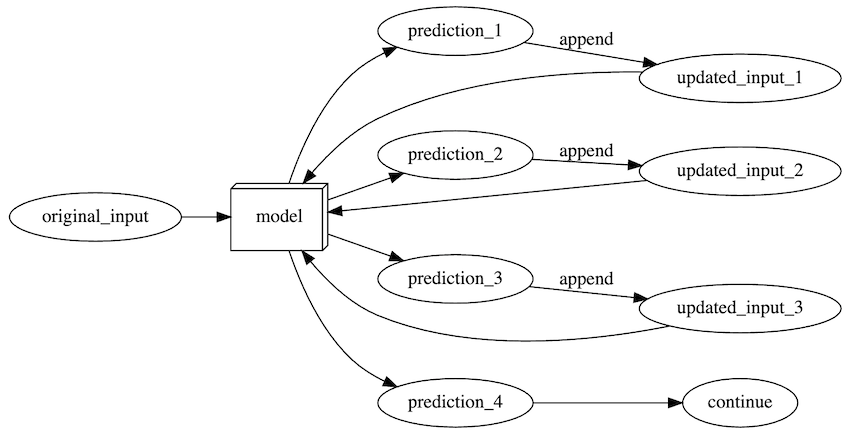

Example flow chart representing the loop we're about to create for making forecasts. Not pictured: retraining a forecasting model every time a forecast is made & new data is acquired. For example, if you're predicting the price of Bitcoin daily, you'd want to retrain your model every day, since each day you're going to have a new data point to work with.

Alright, let's create a function which returns INTO_FUTURE forecasted values using a trained model.

To do so, we'll build the following steps:

1. Function which takes as input:
* a list of values (the Bitcoin historical data)
* a trained model (such as model_9)
* a window into the future to predict (our INTO_FUTURE variable)
* the window size a model was trained on (WINDOW_SIZE) - the model can only predict on the same kind of data it was trained on

2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last WINDOW_SIZE values from the input values (predictions will start from the last WINDOW_SIZE values of the training data)

3. Loop INTO_FUTURE times making a prediction on WINDOW_SIZE datasets which update to remove the first the value and append the latest prediction

* Eventually future predictions will be made using the model's own previous predictions as input

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

Nice! Time to bring BitPredict 💰📈 to life and make future forecasts of the price of Bitcoin.


In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)


1/1 [==============================] - 0s 58ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55706.6328125

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55706.6328125 ] -> Prediction: 51818.765625

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55706.6328125  51818.765625  ] -> Prediction: 50013.58203125

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55706.6328125  51818.765625   50013.58203125] -> Prediction: 48913.8671875

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55706.6328125
 51818.765625   50013.58203125 48913.867187

In [ ]:
future_forecast[:10]

[55706.633,
 51818.766,
 50013.582,
 48913.867,
 46301.805,
 46211.953,
 48704.246,
 54937.17,
 51438.844,
 49425.965]

## Plot future forecasts

To plot our model's future forecasts against the historical data of Bitcoin, we're going to need a series of future dates (future dates from the final date of where our dataset ends).

How about we create a function to return a date range from some specified start date to a specified number of days into the future (INTO_FUTURE).

To do so, we'll use a combination of NumPy's datetime64 datatype (our Bitcoin dates are already in this datatype) as well as NumPy's timedelta64 method which helps to create date ranges.

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date


In [ ]:
# The start date of our forecasted dates will be the last date of our dataset.
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

Look at that! We've now got a list of dates we can use to visualize our future Bitcoin predictions.

But to make sure the lines of the plot connect (try not running the cell below and then plotting the data to see what I mean), let's insert the last timestep and Bitcoin price of our training data to the next_time_steps and future_forecast arrays.

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55706.633, 51818.766, 50013.582, 48913.867, 46301.805,
        46211.953, 48704.246, 54937.17 , 51438.844, 49425.965, 47655.367,
        46394.273, 48367.625, 51774.926], dtype=float32))

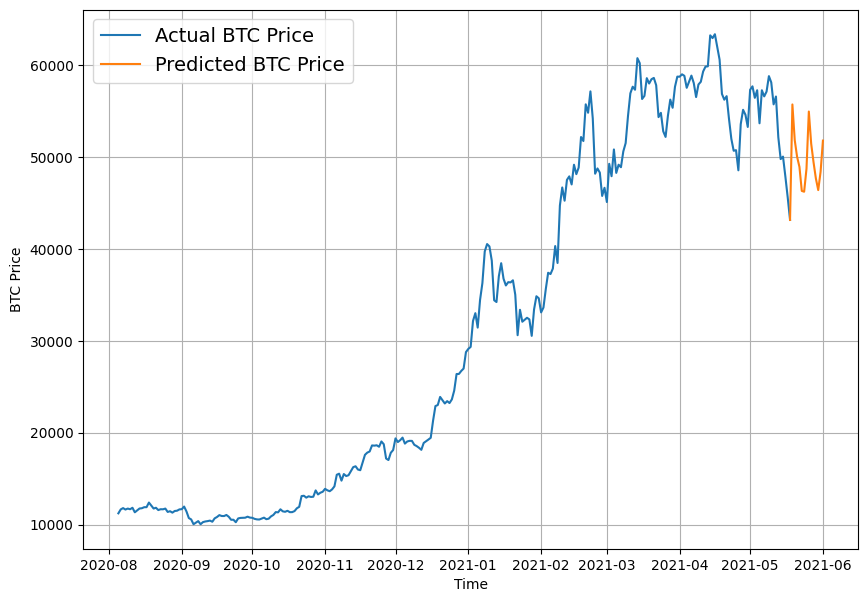

In [ ]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")



It looks like our predictions are starting to form a bit of a cyclic pattern (up and down in the same way).

Perhaps that's due to our model overfitting the training data and not generalizing well for future data. Also, as you could imagine, the further you predict into the future, the higher your chance for error (try seeing what happens when you predict 100 days into the future).

But of course, we can't measure these predictions as they are because after all, they're predictions into the actual-future (by the time you read this, the future might have already happened, if so, how did the model go?).

🔑 Note: A reminder, the predictions we've made here are not financial advice. And by now, you should be well aware of just how poor machine learning models can be at forecasting values in an open system - anyone promising you a model which can "beat the market" is likely trying to scam you, oblivious to their errors or very lucky.

# Model 10: Why forecasting is BS (the turkey problem 🦃)

When creating any kind of forecast, you must keep the turkey problem in mind.

The turkey problem is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

The story goes, a turkey lives a good life for 1000 days, being fed every day and taken care of by its owners until the evening before Thanksgiving.

Based on the turkey's observational data, it has no reason to believe things shouldn't keep going the way they are.

In other words, how could a turkey possibly predict that on day 1001, after 1000 consectutive good days, it was about to have a far from ideal day.

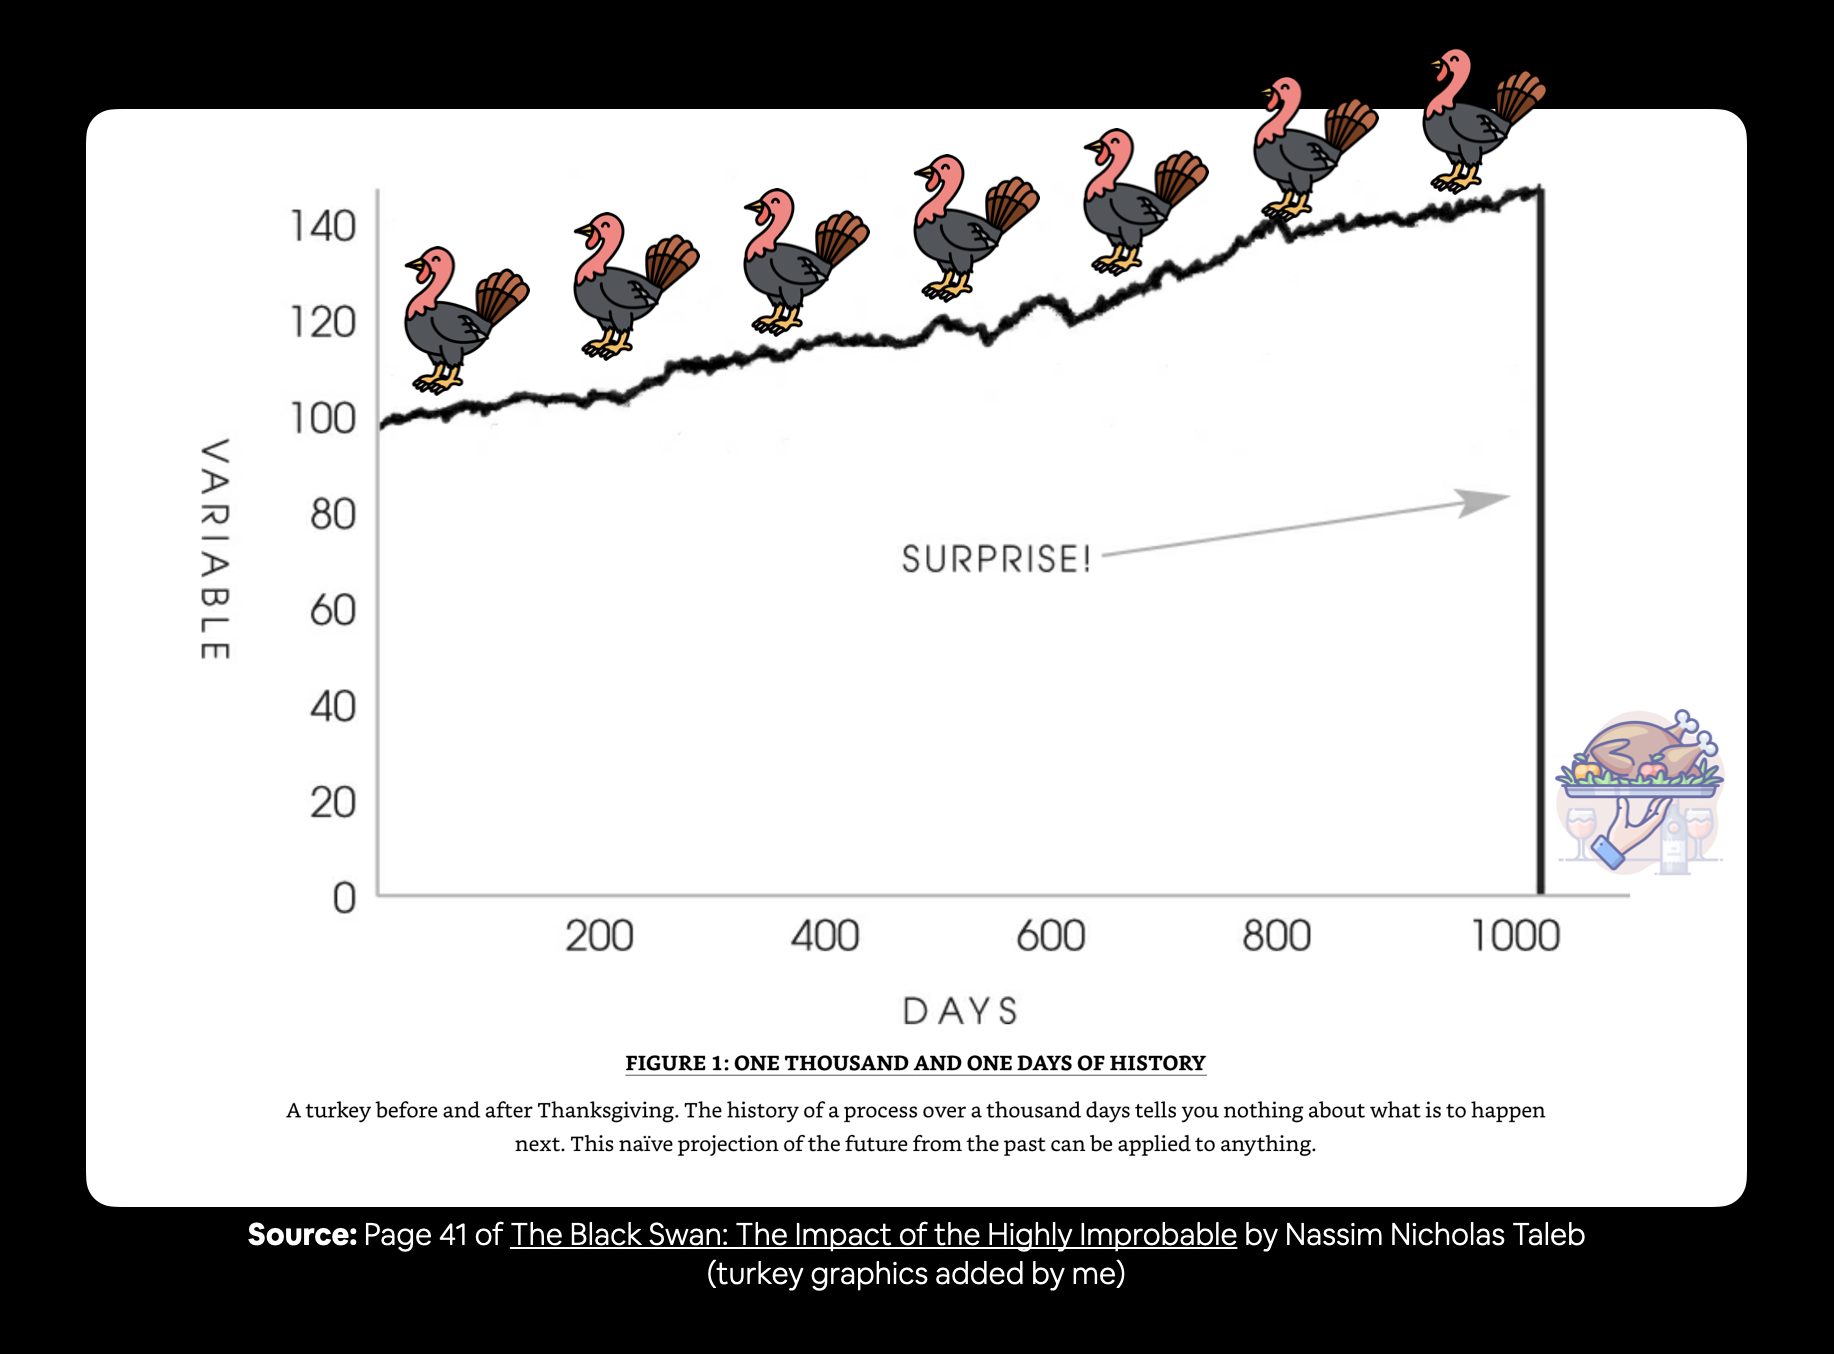

Example of the turkey problem. A turkey might live 1000 good days and none of them would be a sign of what's to happen on day 1001. Similar with forecasting, your historical data may not have any indication of a change which is about to come. The graph image is from page 41 of The Black Swan by Nassim Taleb (I added in the turkey graphics).

How does this relate to predicting the price of Bitcoin (or the price of any stock or figure in an open market)?

You could have the historical data of Bitcoin for its entire existence and build a model which predicts it perfectly.

But then one day for some unknown and unpredictable reason, the price of Bitcoin plummets 100x in a single day.

Of course, this kind of scenario is unlikely.

But that doesn't take away from its significance.

Think about it in your own life, how many times have the most significant events happened seemingly out of the blue?

As in, you could go to a cafe and run into the love of your life, despite visiting the same cafe for 10-years straight and never running into this person before.

The same thing goes for predicting the price of Bitcoin, you could make money for 10-years straight and then lose it all in a single day.

It doesn't matter how many times you get paid, it matters the amount you get paid.

📖 Resource: If you'd like to learn more about the turkey problem, I'd recommend the following:

Explaining both the XIV trade and why forecasting is BS by Nassim Taleb
The Black Swan by Nassim Taleb (epsecially Chapter 4 which outlines and discusses the turkey problem)
Let's get specific and see how the turkey problem effects us modelling the historical and future price of Bitcoin.

To do so, we're going to manufacture a highly unlikely data point into the historical price of Bitcoin, the price falling 100x in one day.

🔑 Note: A very unlikely and unpredictable event such as the price of Bitcoin falling 100x in a single day (note: the adjective "unlikely" is based on the historical price changes of Bitcoin) is also referred to a Black Swan event. A Black Swan event is an unknown unknown, you have no way of predicting whether or not it will happen but these kind of events often have a large impact.

In [ ]:
# Let's introduce a Turkey problem to our BTC data (price BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase the Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

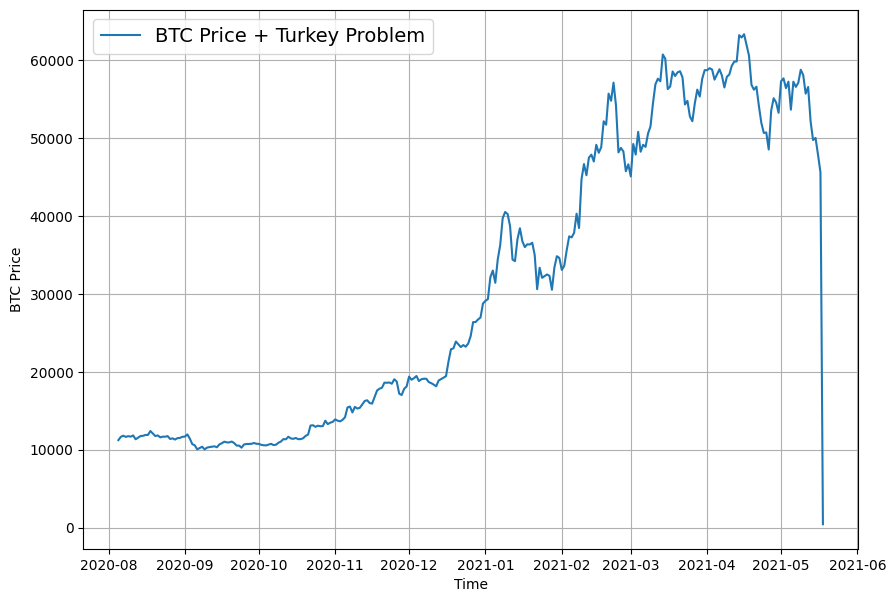

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

Remember, all we've changed is a single data point out of our entire dataset.

Before we build a model, let's create some windowed datasets with our turkey data.

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Building a turkey model (model to predict on turkey data)

With our updated data, we only changed 1 value.

Let's see how it effects a model.

To keep things comparable to previous models, we'll create a turkey_model which is a clone of model_1 (same architecture, but different data).

That way, when we evaluate the turkey_model we can compare its results to model_1_results and see how much a single data point can influence a model's performance.

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate turkey model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 671.2723


671.2722778320312

In [ ]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 640.7581


640.7581176757812

In [ ]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.409 , 8793.427 , 9058.032 , 8773.825 , 8747.911 , 8736.2295,
       8690.814 , 8518.624 , 8466.192 , 8538.629 ], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17133.334,
 'mse': 614672260.0,
 'rmse': 23721.037,
 'mape': 121.4187,
 'mase': 26.513887}

And with just one value change, our error metrics go through the roof.

To make sure, let's remind ourselves of how model_1 went on unmodified Bitcoin data (no turkey problem).

In [ ]:
model_1_results

{'mae': 564.17957,
 'mse': 1153095.1,
 'rmse': 1073.8226,
 'mape': 2.511514,
 'mase': 0.9911072}

By changing just one value, the turkey_model MAE increases almost 30x over model_1.

Finally, we'll visualize the turkey predictions over the test turkey data.

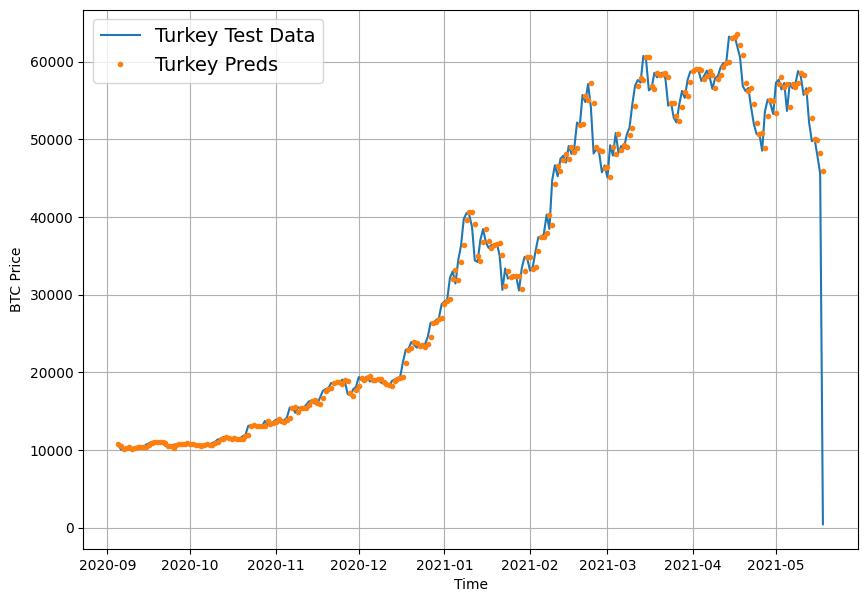

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

Why does this happen?

Why does our model fail to capture the turkey problem data point?

Think about it like this, just like a turkey who lives 1000 joyful days, based on observation alone has no reason to believe day 1001 won't be as joyful as the last, a model which has been trained on historical data of Bitcoin which has no single event where the price decreased by 100x in a day, has no reason to predict it will in the future.

A model cannot predict anything in the future outside of the distribution it was trained on.

In turn, highly unlikely price movements (based on historical movements), upward or downward will likely never be part of a forecast.

However, as we've seen, despite their unlikeliness, these events can have huuuuuuuuge impacts to the performance of our models.

📖 Resource: For a great article which discusses Black Swan events and how they often get ignored due to the assumption that historical events come from a certain distribution and that future events will come from the same distribution see Black Swans, Normal Distributions and Supply Chain Risk by Spend Matters.

# Compare Models

In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

mae           mse          rmse        mape  \
naive_model             567.980225  1.147547e+06   1071.236206    2.516525   
model_1_dense_w7_h1     564.179565  1.153095e+06   1073.822632    2.511514   
model_2_dense_w30_h1    693.301025  1.530006e+06   1236.934204    3.248922   
model_3_dense_w30_h7   1231.134766  5.275039e+06   1416.488770    5.543032   
model_4_CONV1D          569.995911  1.188344e+06   1090.111938    2.554286   
model_5_LSTM            584.182312  1.223016e+06   1105.900635    2.625775   
model_6_multivariate    567.846741  1.169144e+06   1081.269775    2.543697   
model_8_NBEATs          571.912170  1.169238e+06   1081.313354    2.580533   
model_9_ensemble        567.534302  1.144320e+06   1069.729004    2.571699   
model_10_turkey       17133.333984  6.146723e+08  23721.037109  121.418701   

                           mase  
naive_model            0.999570  
model_1_dense_w7_h1    0.991107  
model_2_dense_w30_h1   1.211897  
model_3_dense_w30_h7   2.190735  
model_4_CONV1D         1.001325  
model_5_LSTM           1.026247  
model_6_multivariate   0.997549  
model_8_NBEATs         1.004691  
model_9_ensemble       0.997001  
model_10_turkey       26.513887

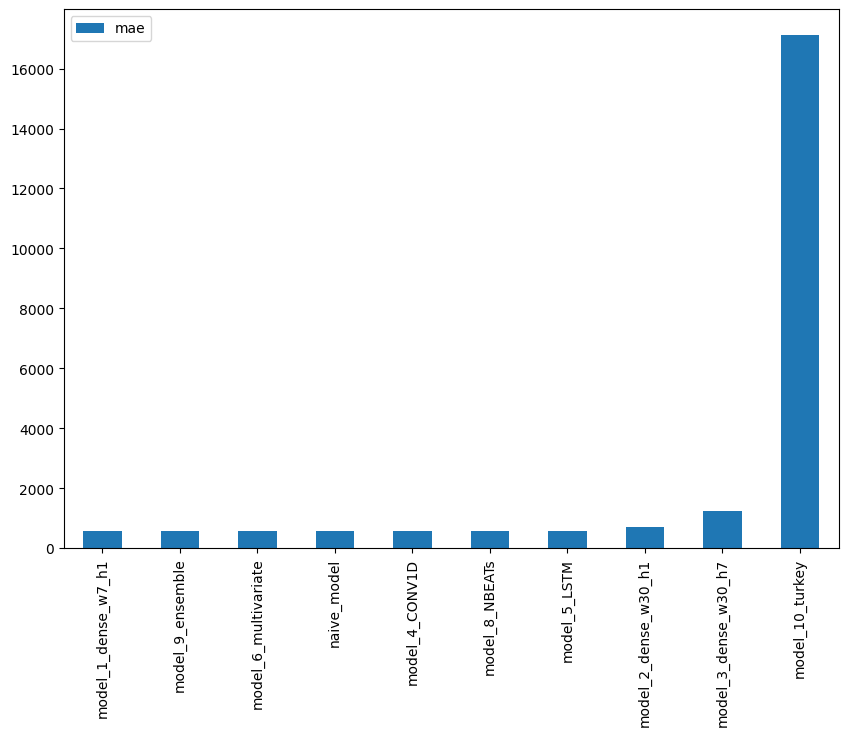

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

The majority of our deep learning models perform on par or only slightly better than the naive model. And for the turkey model, changing a single data point destroys its performance.

🔑 Note: Just because one type of model performs better here doesn't mean it'll perform the best elsewhere (and vice versa, just because one model performs poorly here, doesn't mean it'll perform poorly elsewhere).

As I said at the start, this is not financial advice.

After what we've gone through, you'll now have some of the skills required to callout BS for any future tutorial or blog post or investment sales guide claiming to have model which is able to predict the futrue.

Mark Saroufim's Tweet sums this up nicely (stock market forecasting with a machine learning model is just as reliable as palm reading).

Don't let these results get you down though, forecasting in a closed system (such as predicting the demand of electricity) often yields quite usable results.

If anything, this module teaches anti-knowledge. Knowing that forecasting methods usually don't perform well in open systems.

Plus, sometimes not knowing the future is a benefit. A known future is already the past.